In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('data_series.csv', index_col = 3,parse_dates=True)

# Sort the DataFrame by the index (dates) in ascending order
df = df.sort_index()

In [3]:
df.index

DatetimeIndex(['1947-08-31', '1947-09-30', '1947-10-31', '1947-11-30',
               '1947-12-31', '1948-01-31', '1948-02-29', '1948-03-31',
               '1948-04-30', '1948-05-31',
               ...
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', name='Observation Date', length=923, freq=None)

In [4]:
df.dropna()

Empty DataFrame
Columns: [Dataset, Series Key, Series, Observation Value, Unit, Observation Status, Observation Status Comment]
Index: []

In [5]:
df = df.drop(['Dataset', 'Series Key', 'Series','Unit','Observation Status','Observation Status Comment'], axis=1)

In [6]:
# df.index.freq = 'M'

In [7]:
df.head()

Observation Value
Observation Date                   
1947-08-31                  3.30852
1947-09-30                  3.30852
1947-10-31                  3.30852
1947-11-30                  3.30852
1947-12-31                  3.30852

In [8]:
df.tail()

Observation Value
Observation Date                   
2024-02-29               279.181670
2024-03-31               278.704966
2024-04-30               278.142450
2024-05-31               278.250082
2024-06-30               278.438722

## Time Shifting

In [9]:
df.shift(1).head()

Observation Value
Observation Date                   
1947-08-31                      NaN
1947-09-30                  3.30852
1947-10-31                  3.30852
1947-11-30                  3.30852
1947-12-31                  3.30852

In [10]:
df.shift(1).tail()

Observation Value
Observation Date                   
2024-02-29               280.320611
2024-03-31               279.181670
2024-04-30               278.704966
2024-05-31               278.142450
2024-06-30               278.250082

In [11]:
df.shift(-1).tail()

Observation Value
Observation Date                   
2024-02-29               278.704966
2024-03-31               278.142450
2024-04-30               278.250082
2024-05-31               278.438722
2024-06-30                      NaN

In [12]:
df.shift(periods = 1,freq='M').head()

Observation Value
Observation Date                   
1947-09-30                  3.30852
1947-10-31                  3.30852
1947-11-30                  3.30852
1947-12-31                  3.30852
1948-01-31                  3.30852

## Visualization

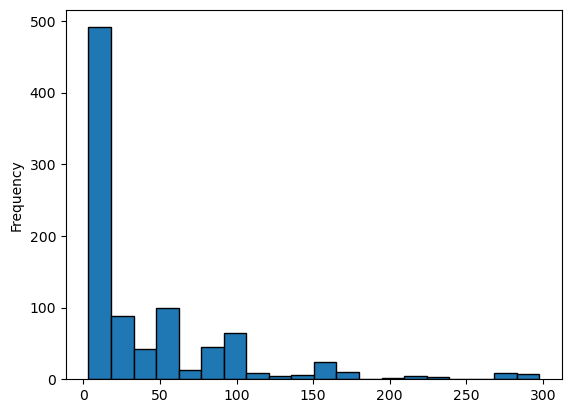

In [13]:
df['Observation Value'].plot.hist(bins=20,edgecolor='k').autoscale(enable=True,axis='both')

<Axes: ylabel='Frequency'>

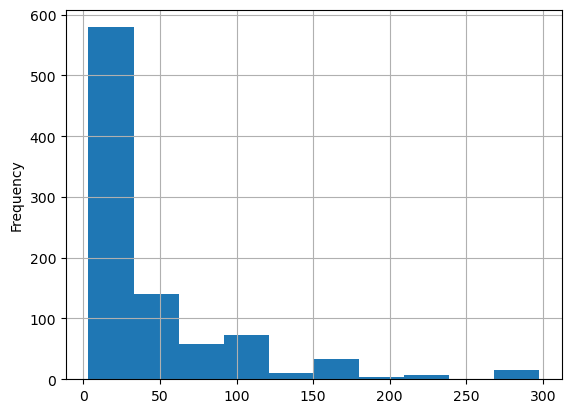

In [14]:
df['Observation Value'].plot.hist(grid = True)

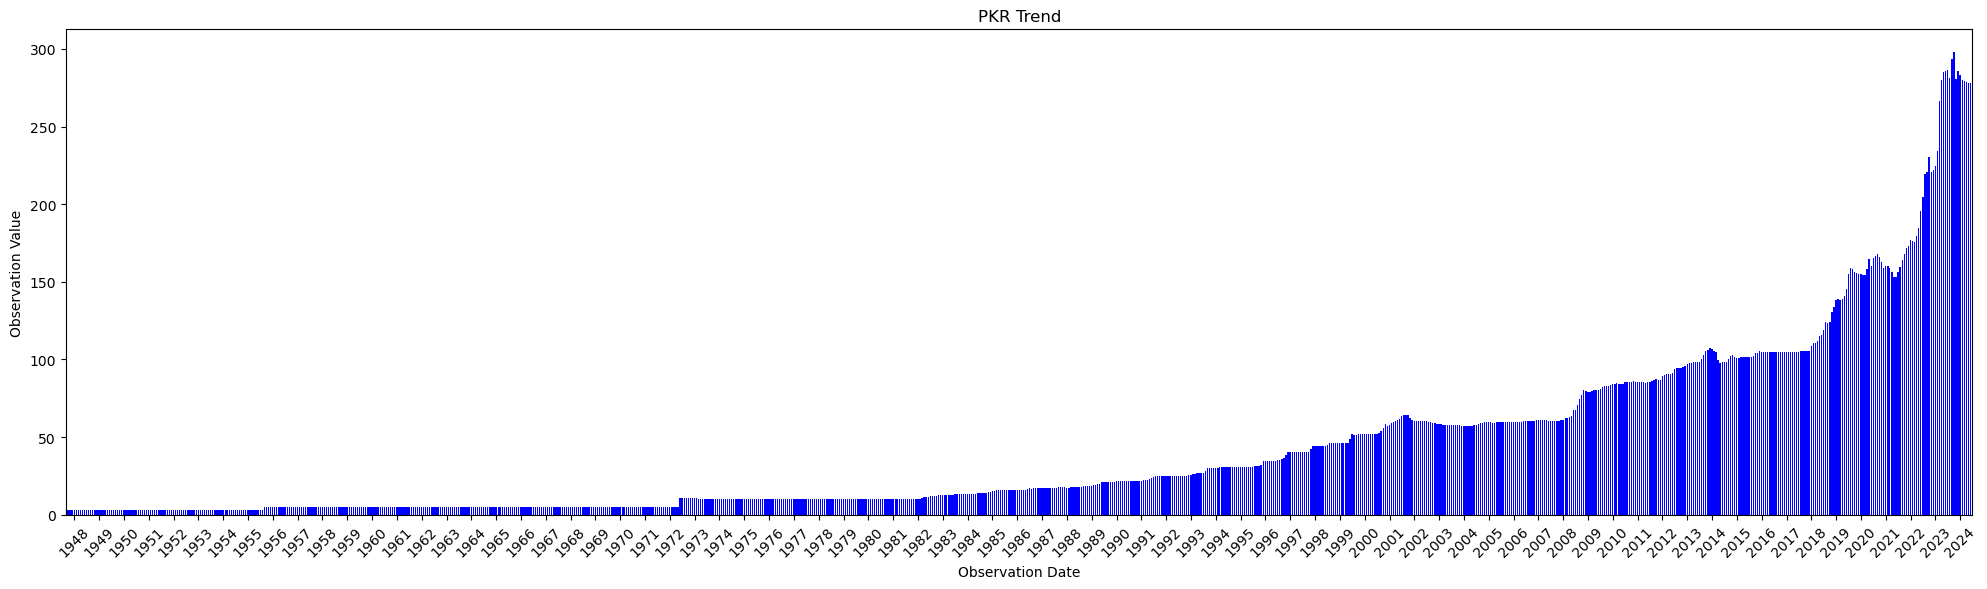

In [15]:
# Create bar plot
plt.figure(figsize=(20, 6))
plt.bar(df.index, df['Observation Value'], width=20, color='blue')

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show one label per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the labels to show only the year

# Set x-axis limits to the range of the data
plt.xlim(df.index.min(), df.index.max())

plt.xlabel('Observation Date')
plt.ylabel('Observation Value')
plt.title('PKR Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

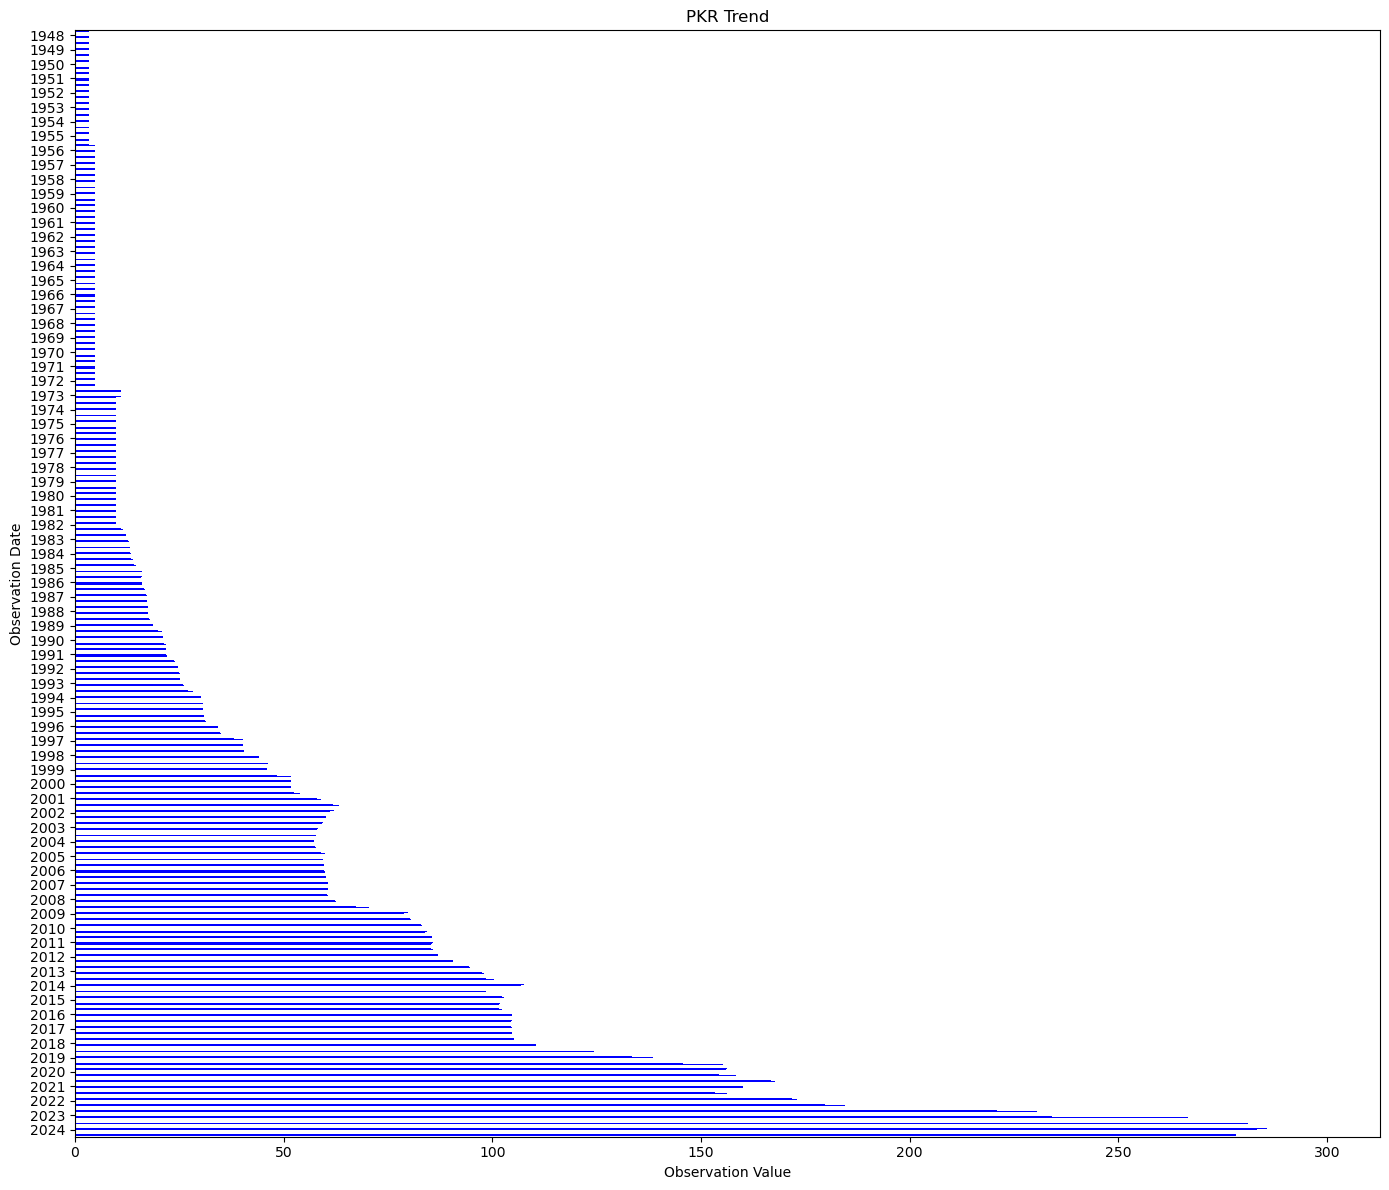

In [16]:
# Create horizontal bar plot
plt.figure(figsize=(14, 12))  # Increased figure size for better readability
plt.barh(df.index, df['Observation Value'], color='blue', height=10)  # Adjusted bar height

# Format the y-axis to show years
plt.gca().yaxis.set_major_locator(mdates.YearLocator())  # Show one label per 5 years
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the labels to show only the year

# Set y-axis limits to the range of the data
plt.ylim(df.index.min(), df.index.max())

plt.ylabel('Observation Date')
plt.xlabel('Observation Value')
plt.title('PKR Trend')
plt.gca().invert_yaxis()  # To display the earliest date at the top
plt.tight_layout()

plt.show()


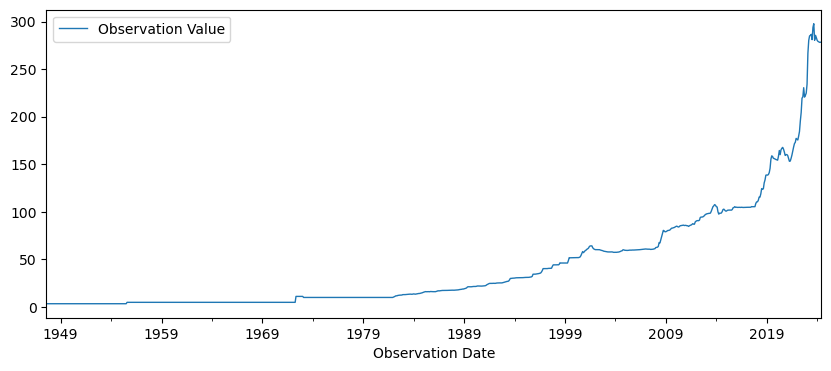

In [17]:
df.plot.line(y='Observation Value',figsize = (10,4),lw = 1);

In [18]:
title = "PKR Trend"
ylabel = 'Value'
xlabel = 'Year'

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Value')]

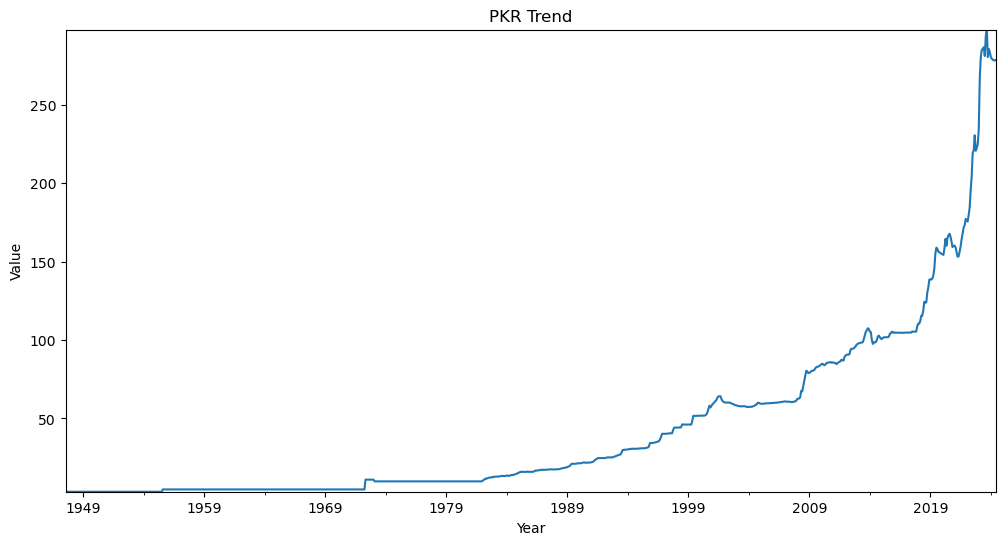

In [19]:
ax = df['Observation Value'].plot(figsize=(12,6),title = title);
ax.autoscale(axis='both',tight=True)
ax.set(xlabel = xlabel, ylabel = ylabel)

<Axes: xlabel='Observation Date'>

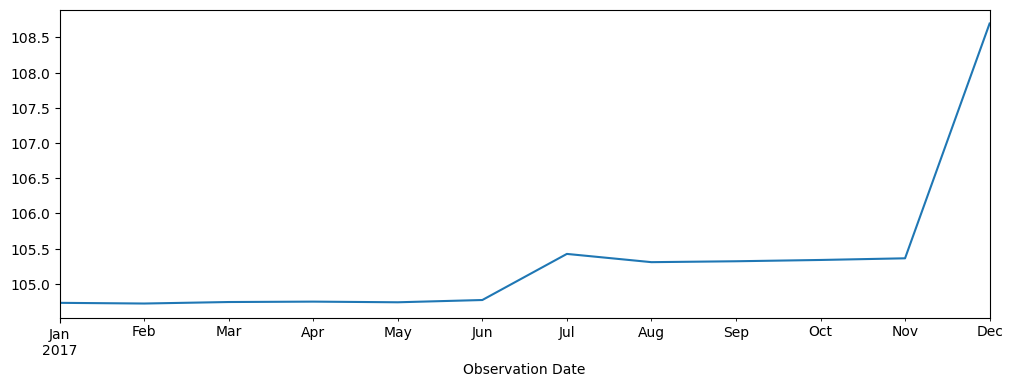

In [20]:
df['Observation Value']['2017-01-01':'2017-12-31'].plot(figsize=(12,4)) #plot level

<Axes: xlabel='Observation Date'>

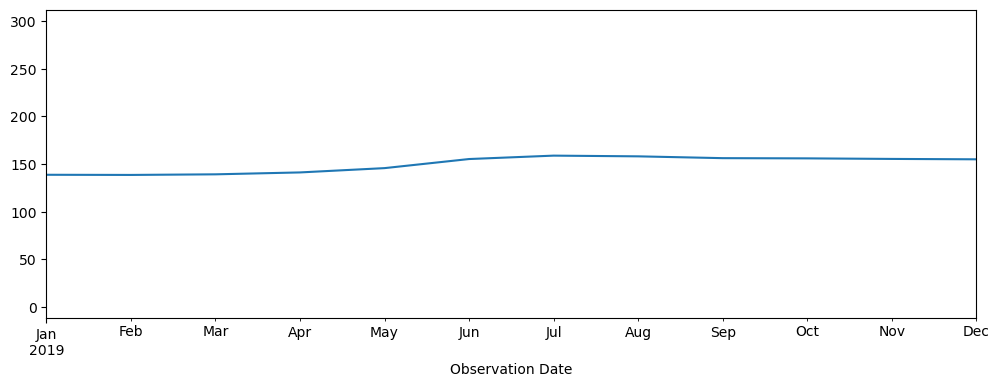

In [21]:
df['Observation Value'].plot(figsize=(12,4),xlim = ['2019-01-01','2019-12-31']) # dataframe level

<Axes: xlabel='Observation Date'>

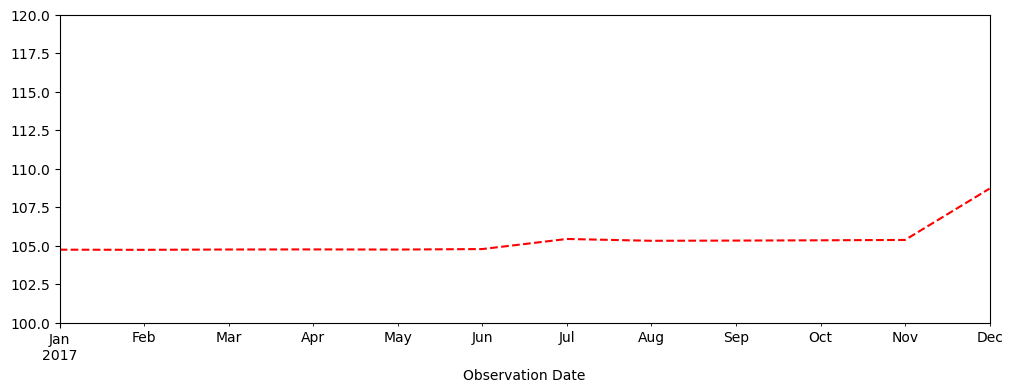

In [22]:
df['Observation Value']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim = [100,120],ls='--',c='red') #plot level

<Axes: >

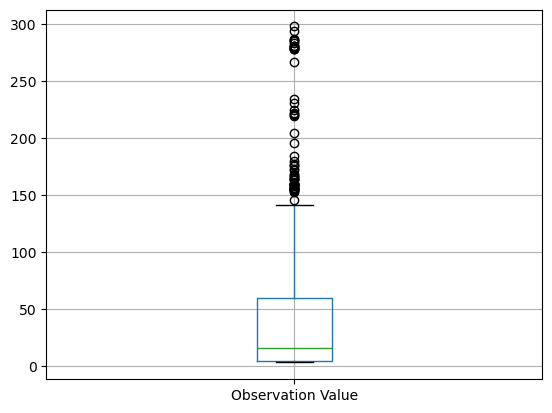

In [23]:
df.boxplot()

<Axes: >

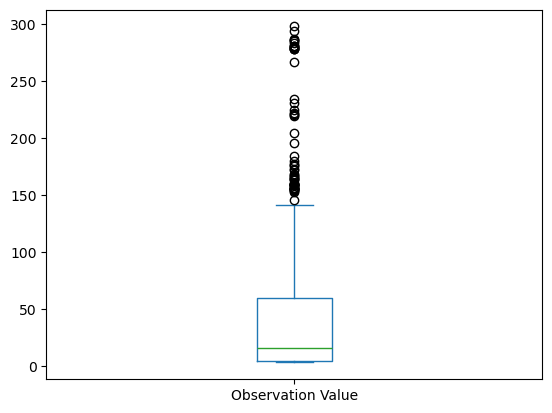

In [24]:
df.plot.box()

<Axes: ylabel='Density'>

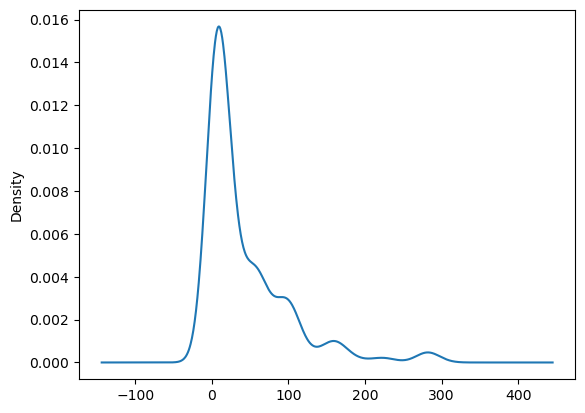

In [25]:
df['Observation Value'].plot.kde()

<Axes: xlabel='Observation Date'>

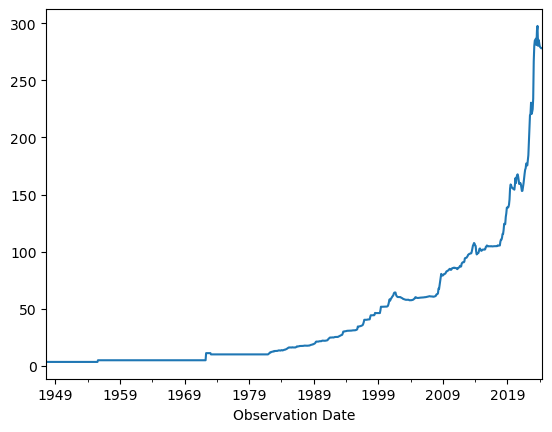

In [26]:
df['Observation Value'].plot()

## Time Resampling

In [27]:
df.resample(rule='A').mean()

Observation Value
Observation Date                   
1947-12-31                 3.308520
1948-12-31                 3.308520
1949-12-31                 3.308520
1950-12-31                 3.308520
1951-12-31                 3.308520
...                             ...
2020-12-31               161.616606
2021-12-31               162.625232
2022-12-31               204.516175
2023-12-31               279.981129
2024-12-31               278.839750

[78 rows x 1 columns]

In [28]:
df.resample(rule='A').min()

Observation Value
Observation Date                   
1947-12-31                 3.308520
1948-12-31                 3.308520
1949-12-31                 3.308520
1950-12-31                 3.308520
1951-12-31                 3.308520
...                             ...
2020-12-31               154.263358
2021-12-31               153.076852
2022-12-31               175.482276
2023-12-31               234.135952
2024-12-31               278.142450

[78 rows x 1 columns]

In [29]:
df.resample(rule='A').max()

Observation Value
Observation Date                   
1947-12-31                 3.308520
1948-12-31                 3.308520
1949-12-31                 3.308520
1950-12-31                 3.308520
1951-12-31                 3.308520
...                             ...
2020-12-31               167.706397
2021-12-31               177.176357
2022-12-31               230.465862
2023-12-31               297.754172
2024-12-31               280.320611

[78 rows x 1 columns]

In [30]:
df.resample(rule='A').std()

Observation Value
Observation Date                   
1947-12-31                 0.000000
1948-12-31                 0.000000
1949-12-31                 0.000000
1950-12-31                 0.000000
1951-12-31                 0.000000
...                             ...
2020-12-31                 4.533895
2021-12-31                 8.117371
2022-12-31                21.083201
2023-12-31                16.313206
2024-12-31                 0.815204

[78 rows x 1 columns]

In [31]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [32]:
df.resample(rule='A').apply(first_day)

C:\Users\Ruman\AppData\Local\Temp\ipykernel_11632\710633468.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


Observation Value
Observation Date                   
1947-12-31                 3.308520
1948-12-31                 3.308520
1949-12-31                 3.308520
1950-12-31                 3.308520
1951-12-31                 3.308520
...                             ...
2020-12-31               154.656144
2021-12-31               160.153552
2022-12-31               176.310845
2023-12-31               234.135952
2024-12-31               280.320611

[78 rows x 1 columns]

<Axes: xlabel='Observation Date'>

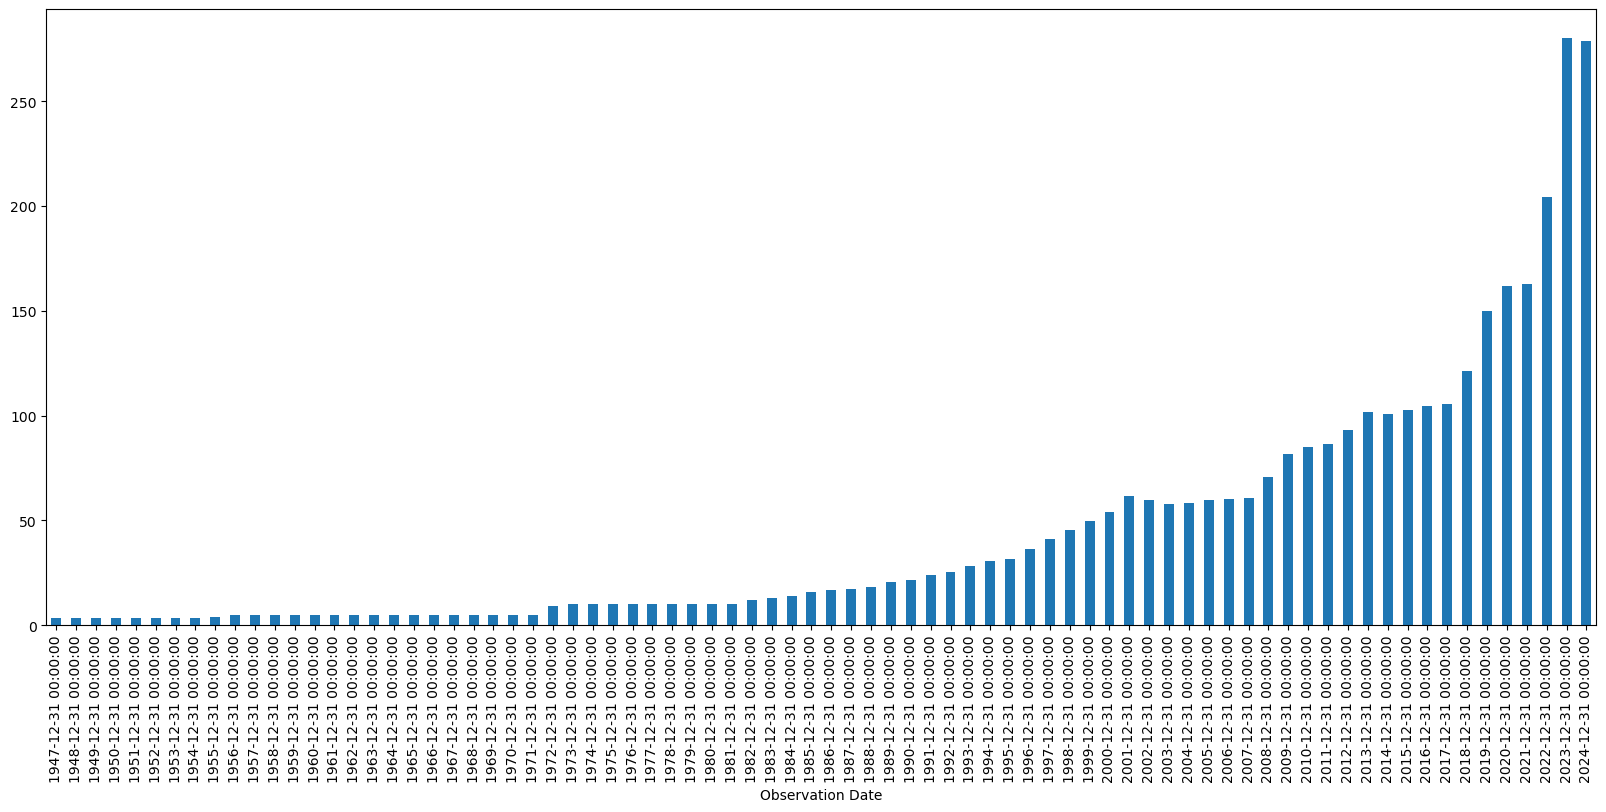

In [33]:
df['Observation Value'].resample('A').mean().plot.bar(figsize=(20, 8))

## Rolling and Expanding

### Rolling

<Axes: xlabel='Observation Date'>

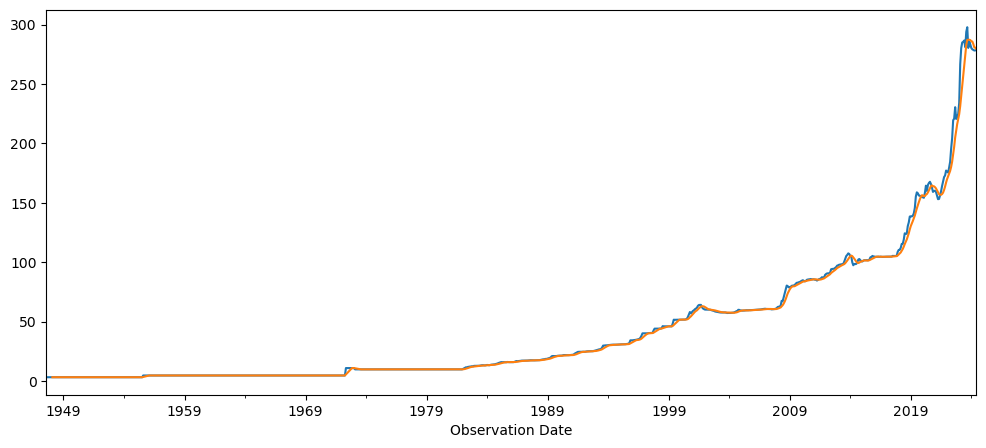

In [34]:
df['Observation Value'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Observation Value'].plot() ## Average Price for last 7 days

<Axes: xlabel='Observation Date'>

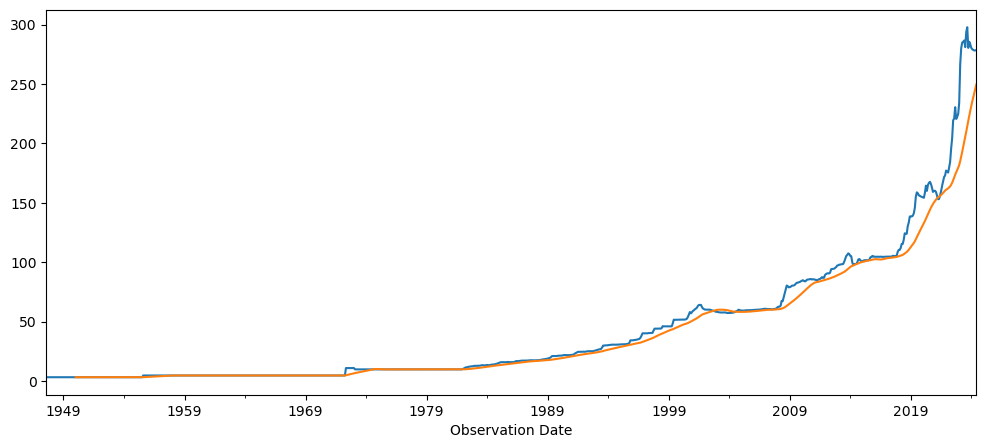

In [35]:
df['Observation Value'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Observation Value'].plot() ## Average Price for last 30 days

<Axes: xlabel='Observation Date'>

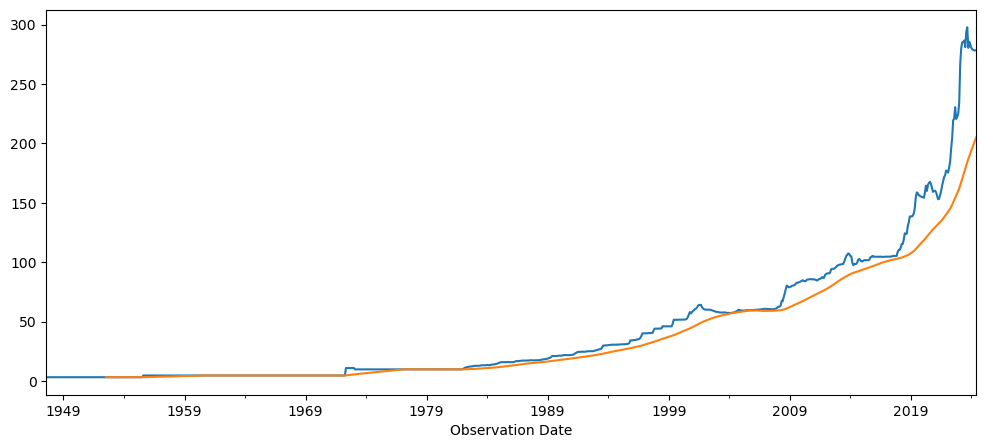

In [36]:
df['Observation Value'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Observation Value'].plot() ## Average Price for last 7 days

In [37]:
df['Observation Value : 30 Day Mean'] = df['Observation Value'].rolling(window=30).mean()

In [38]:
df.head()

Observation Value  Observation Value : 30 Day Mean
Observation Date                                                    
1947-08-31                  3.30852                              NaN
1947-09-30                  3.30852                              NaN
1947-10-31                  3.30852                              NaN
1947-11-30                  3.30852                              NaN
1947-12-31                  3.30852                              NaN

<Axes: xlabel='Observation Date'>

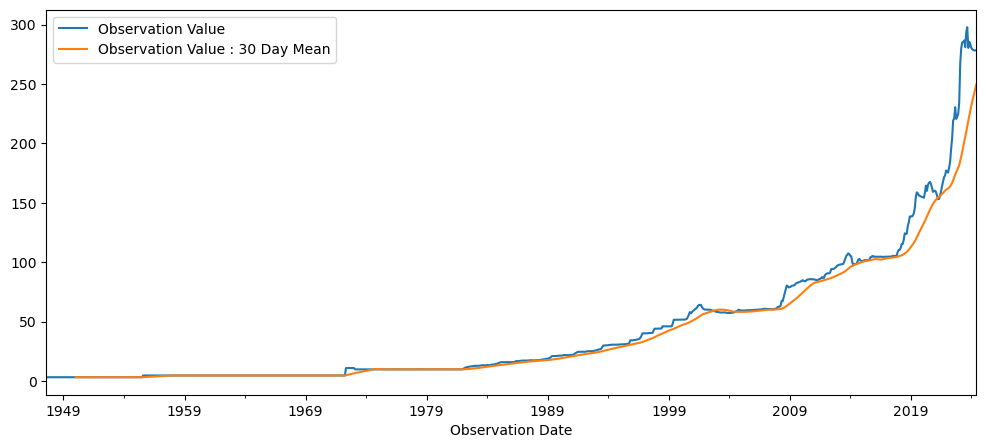

In [39]:
df[['Observation Value','Observation Value : 30 Day Mean']].plot(figsize=(12,5))

In [40]:
df.tail()

Observation Value  Observation Value : 30 Day Mean
Observation Date                                                    
2024-02-29               279.181670                       235.447444
2024-03-31               278.704966                       239.135718
2024-04-30               278.142450                       242.683973
2024-05-31               278.250082                       246.191459
2024-06-30               278.438722                       249.566872

### Expanding

<Axes: xlabel='Observation Date'>

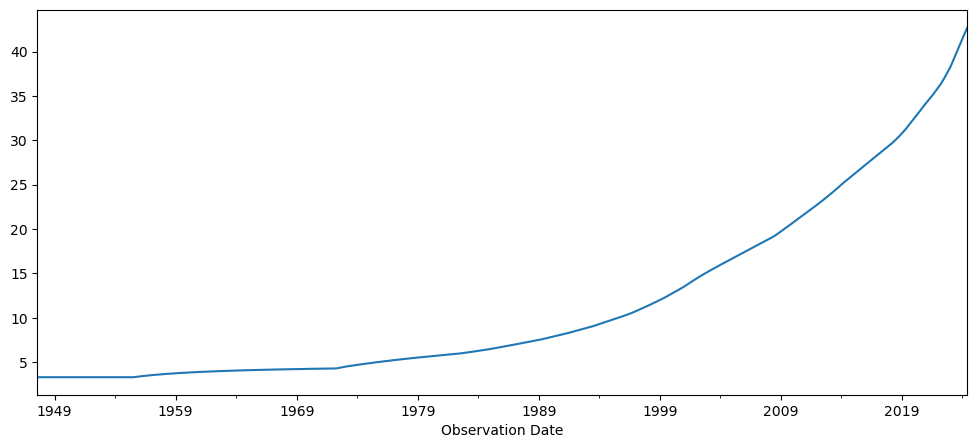

In [41]:
df['Observation Value'].expanding().mean().plot(figsize=(12,5)) # Average of col at specific point

## HP Filter

In [42]:
pkr_trend,pkr_cycle = hpfilter(df['Observation Value'],lamb=1600)

In [43]:
type(pkr_trend)

pandas.core.series.Series

<Axes: xlabel='Observation Date'>

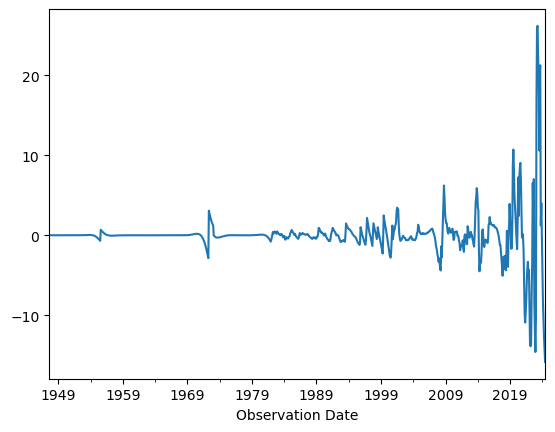

In [44]:
pkr_trend.plot()

In [45]:
df['trend'] = pkr_trend

In [46]:
df.head()

Observation Value  Observation Value : 30 Day Mean     trend
Observation Date                                                              
1947-08-31                  3.30852                              NaN -0.000019
1947-09-30                  3.30852                              NaN -0.000012
1947-10-31                  3.30852                              NaN -0.000005
1947-11-30                  3.30852                              NaN  0.000002
1947-12-31                  3.30852                              NaN  0.000009

<Axes: xlabel='Observation Date'>

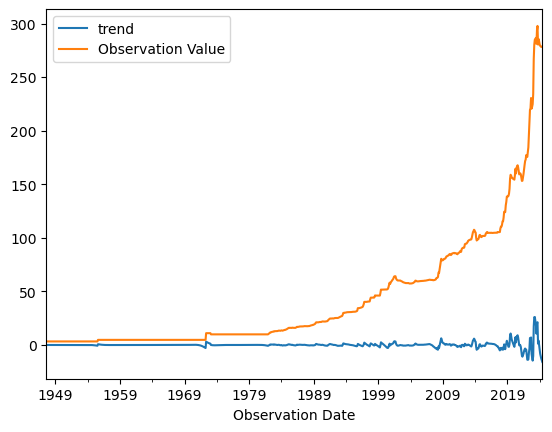

In [47]:
df[['trend','Observation Value']].plot()

<Axes: xlabel='Observation Date'>

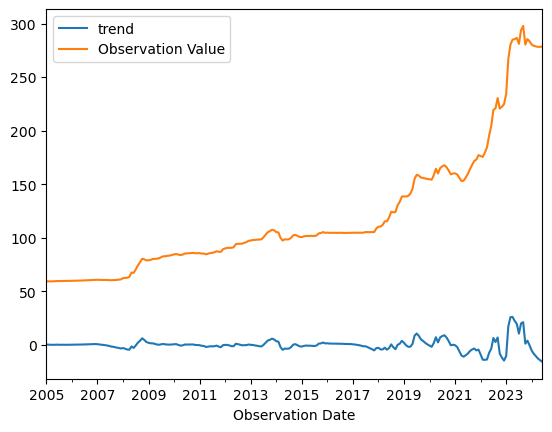

In [48]:
df[['trend','Observation Value']]['2005-01-01':].plot()

## ETS Decomposition

In [49]:
result = seasonal_decompose(df['Observation Value'],model='multiplicative')

In [50]:
result

In [51]:
result.seasonal

Observation Date
1947-08-31    1.007323
1947-09-30    1.006534
1947-10-31    1.004296
1947-11-30    1.002057
1947-12-31    0.999670
                ...   
2024-02-29    0.994219
2024-03-31    0.991835
2024-04-30    0.990585
2024-05-31    1.000968
2024-06-30    1.002245
Name: seasonal, Length: 923, dtype: float64

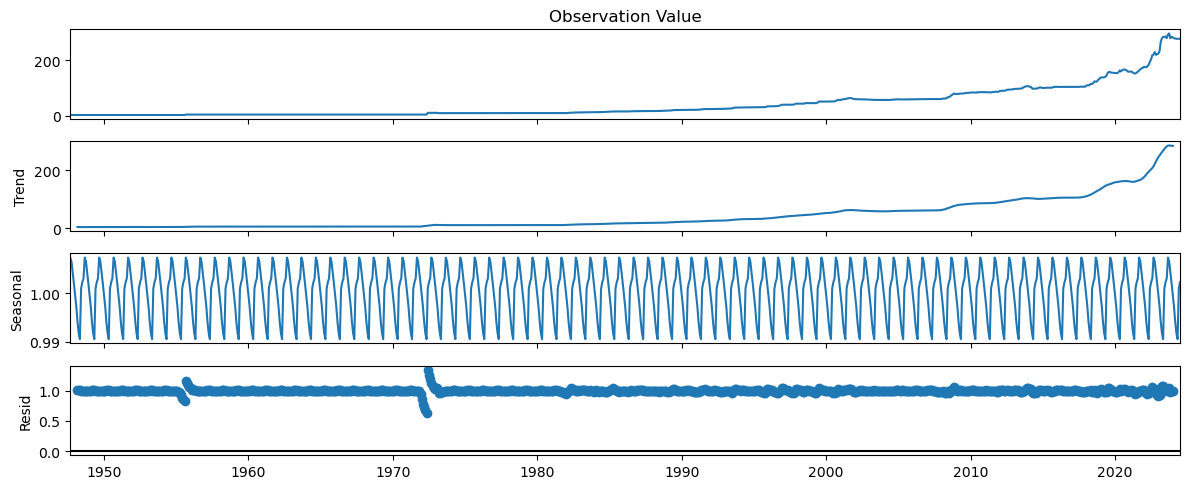

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

### EWMA

In [53]:
df['6-month-SMA'] = df['Observation Value'].rolling(window=6).mean()

In [54]:
df['12-month-SMA'] = df['Observation Value'].rolling(window=12).mean()

<Axes: xlabel='Observation Date'>

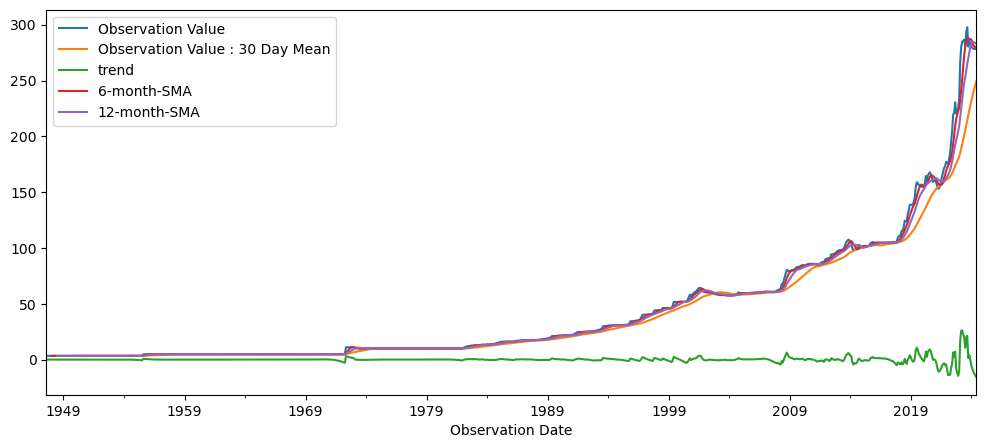

In [55]:
df.plot()

In [56]:
 df['EWMA-12'] = df['Observation Value'].ewm(span=12).mean()

<Axes: xlabel='Observation Date'>

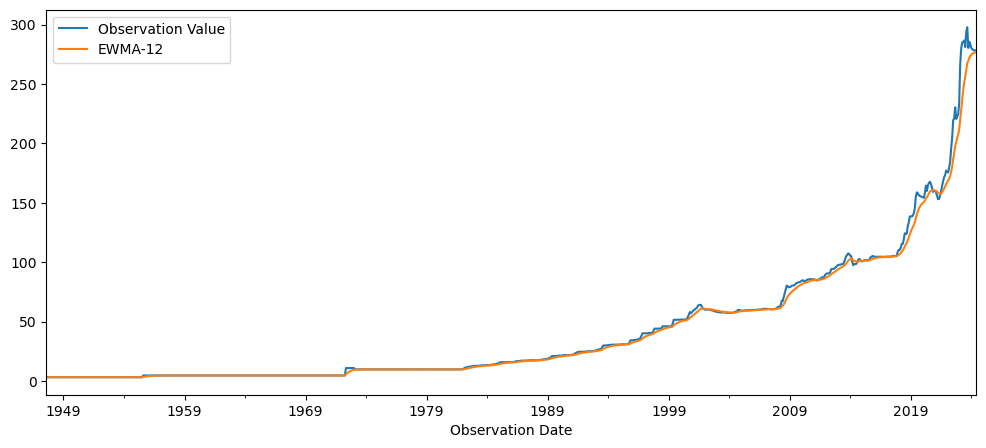

In [57]:
 df[['Observation Value','EWMA-12']].plot()

### Holt Winters Method

In [58]:
df.index

DatetimeIndex(['1947-08-31', '1947-09-30', '1947-10-31', '1947-11-30',
               '1947-12-31', '1948-01-31', '1948-02-29', '1948-03-31',
               '1948-04-30', '1948-05-31',
               ...
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', name='Observation Date', length=923, freq=None)

In [59]:
inferred_freq = pd.infer_freq(df.index)
print(f"Inferred Frequency: {inferred_freq}")

Inferred Frequency: M


In [60]:
df.index.freq = 'M'

In [61]:
df.index

DatetimeIndex(['1947-08-31', '1947-09-30', '1947-10-31', '1947-11-30',
               '1947-12-31', '1948-01-31', '1948-02-29', '1948-03-31',
               '1948-04-30', '1948-05-31',
               ...
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', name='Observation Date', length=923, freq='M')

In [62]:
df.head()

Observation Value  Observation Value : 30 Day Mean  \
Observation Date                                                       
1947-08-31                  3.30852                              NaN   
1947-09-30                  3.30852                              NaN   
1947-10-31                  3.30852                              NaN   
1947-11-30                  3.30852                              NaN   
1947-12-31                  3.30852                              NaN   

                     trend  6-month-SMA  12-month-SMA  EWMA-12  
Observation Date                                                
1947-08-31       -0.000019          NaN           NaN  3.30852  
1947-09-30       -0.000012          NaN           NaN  3.30852  
1947-10-31       -0.000005          NaN           NaN  3.30852  
1947-11-30        0.000002          NaN           NaN  3.30852  
1947-12-31        0.000009          NaN           NaN  3.30852

In [63]:
span = 12
alpha = 2/(span + 1)

In [64]:
df['EWMA12'] = df['Observation Value'].ewm(alpha=alpha,adjust=False).mean()

In [65]:
df.head()

Observation Value  Observation Value : 30 Day Mean  \
Observation Date                                                       
1947-08-31                  3.30852                              NaN   
1947-09-30                  3.30852                              NaN   
1947-10-31                  3.30852                              NaN   
1947-11-30                  3.30852                              NaN   
1947-12-31                  3.30852                              NaN   

                     trend  6-month-SMA  12-month-SMA  EWMA-12   EWMA12  
Observation Date                                                         
1947-08-31       -0.000019          NaN           NaN  3.30852  3.30852  
1947-09-30       -0.000012          NaN           NaN  3.30852  3.30852  
1947-10-31       -0.000005          NaN           NaN  3.30852  3.30852  
1947-11-30        0.000002          NaN           NaN  3.30852  3.30852  
1947-12-31        0.000009          NaN           NaN  3.30852  3.30852

In [66]:
model = SimpleExpSmoothing(df['Observation Value'])

In [67]:
fitted_model = model.fit(smoothing_level = alpha,optimized = False)

In [68]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [69]:
df.head()

Observation Value  Observation Value : 30 Day Mean  \
Observation Date                                                       
1947-08-31                  3.30852                              NaN   
1947-09-30                  3.30852                              NaN   
1947-10-31                  3.30852                              NaN   
1947-11-30                  3.30852                              NaN   
1947-12-31                  3.30852                              NaN   

                     trend  6-month-SMA  12-month-SMA  EWMA-12   EWMA12  \
Observation Date                                                          
1947-08-31       -0.000019          NaN           NaN  3.30852  3.30852   
1947-09-30       -0.000012          NaN           NaN  3.30852  3.30852   
1947-10-31       -0.000005          NaN           NaN  3.30852  3.30852   
1947-11-30        0.000002          NaN           NaN  3.30852  3.30852   
1947-12-31        0.000009          NaN           NaN  3.30852  3.30852   

                    SES12  
Observation Date           
1947-08-31        3.30852  
1947-09-30        3.30852  
1947-10-31        3.30852  
1947-11-30        3.30852  
1947-12-31        3.30852

In [70]:
df.tail()

Observation Value  Observation Value : 30 Day Mean  \
Observation Date                                                       
2024-02-29               279.181670                       235.447444   
2024-03-31               278.704966                       239.135718   
2024-04-30               278.142450                       242.683973   
2024-05-31               278.250082                       246.191459   
2024-06-30               278.438722                       249.566872   

                      trend  6-month-SMA  12-month-SMA     EWMA-12  \
Observation Date                                                     
2024-02-29        -8.271945   284.405001    284.871953  275.369951   
2024-03-31       -10.507192   281.230133    284.747161  275.883030   
2024-04-30       -12.772689   280.861082    284.180226  276.230633   
2024-05-31       -14.339308   279.649308    283.577236  276.541318   
2024-06-30       -15.815035   278.839750    282.898457  276.833226   

                      EWMA12       SES12  
Observation Date                          
2024-02-29        275.369951  275.369951  
2024-03-31        275.883030  275.883030  
2024-04-30        276.230633  276.230633  
2024-05-31        276.541318  276.541318  
2024-06-30        276.833226         NaN

In [71]:
# df['SES12'] = SimpleExpSmoothing(df['Observation Value']).fit(smoothing_level = alpha,optimized = False).fittedvalues.shift(-1)

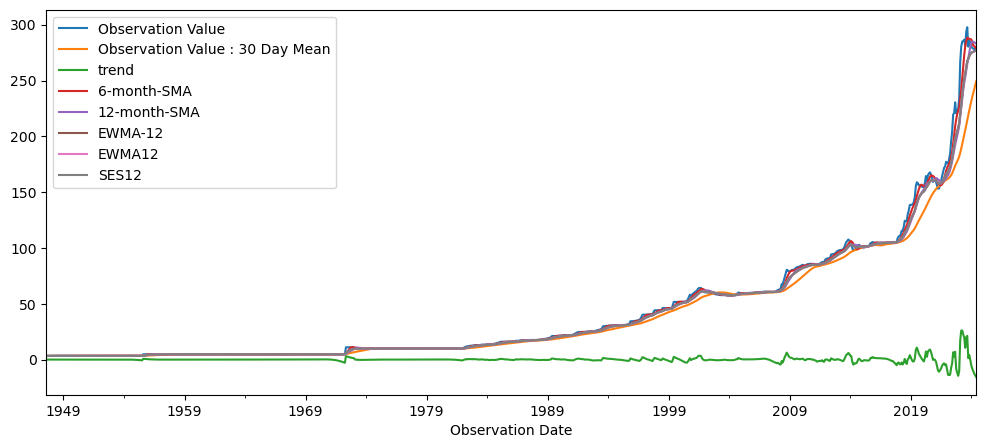

In [72]:
df.plot();

In [73]:
df['DES_add_12'] = ExponentialSmoothing(df['Observation Value'],trend ='add' ).fit().fittedvalues.shift(-1)

In [74]:
df.columns

Index(['Observation Value', 'Observation Value : 30 Day Mean', 'trend',
       '6-month-SMA', '12-month-SMA', 'EWMA-12', 'EWMA12', 'SES12',
       'DES_add_12'],
      dtype='object')

<Axes: xlabel='Observation Date'>

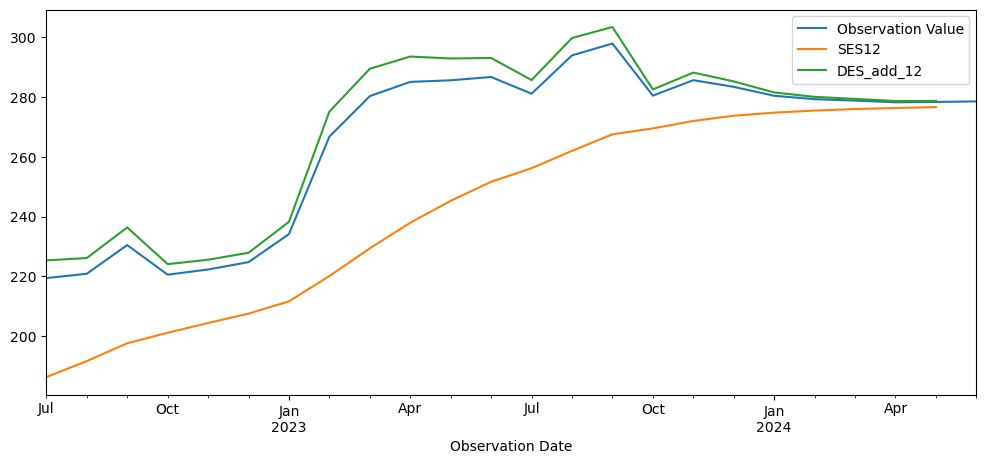

In [75]:
df[['Observation Value','SES12','DES_add_12']].iloc[-24:].plot(figsize = (12,5))

In [76]:
df['DES_mul_12'] = ExponentialSmoothing(df['Observation Value'],trend ='mul').fit().fittedvalues.shift(-1)

<Axes: xlabel='Observation Date'>

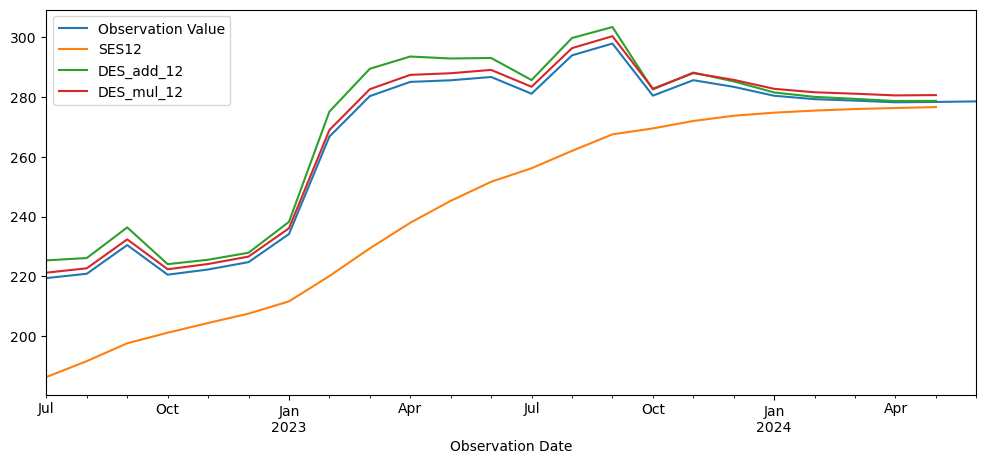

In [77]:
df[['Observation Value','SES12','DES_add_12','DES_mul_12']].iloc[-24:].plot(figsize = (12,5))

In [78]:
#Thus multiplicative model is better because closer to real data

In [79]:
df['TES_mul_12'] = ExponentialSmoothing(df['Observation Value'],trend = 'mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues

<Axes: xlabel='Observation Date'>

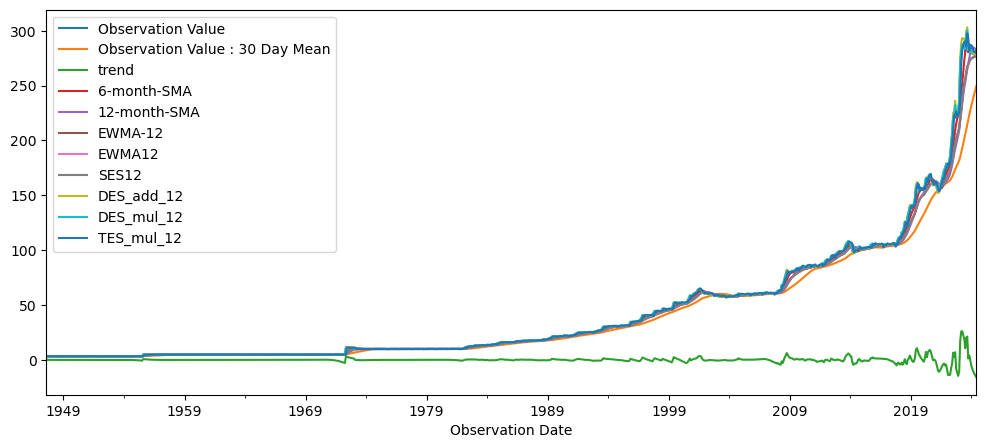

In [80]:
df.plot()

In [81]:
df.columns

Index(['Observation Value', 'Observation Value : 30 Day Mean', 'trend',
       '6-month-SMA', '12-month-SMA', 'EWMA-12', 'EWMA12', 'SES12',
       'DES_add_12', 'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<Axes: xlabel='Observation Date'>

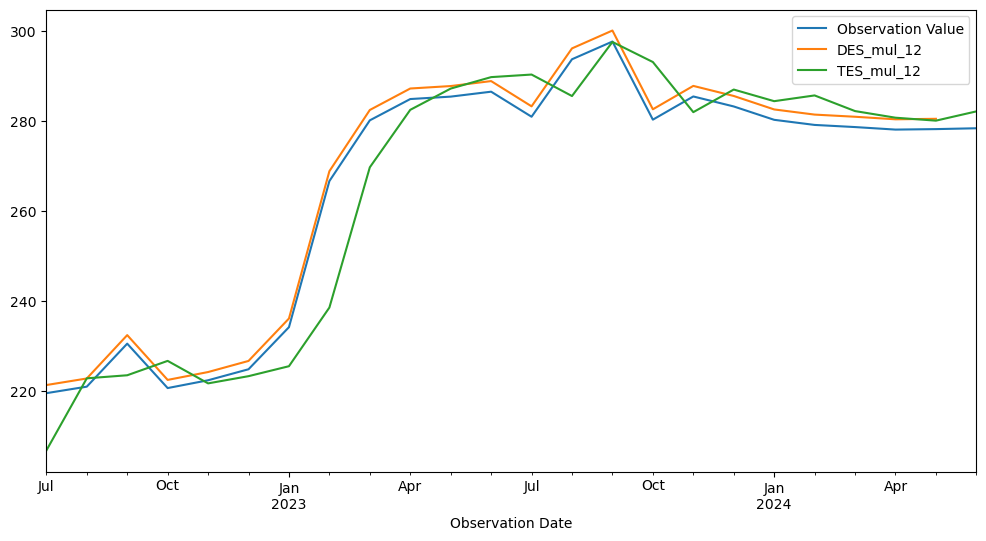

In [82]:
df[['Observation Value','DES_mul_12','TES_mul_12']].iloc[-24:].plot(figsize = (12,6))

## Train-Test Split

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 923 entries, 1947-08-31 to 2024-06-30
Freq: M
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Observation Value                923 non-null    float64
 1   Observation Value : 30 Day Mean  894 non-null    float64
 2   trend                            923 non-null    float64
 3   6-month-SMA                      918 non-null    float64
 4   12-month-SMA                     912 non-null    float64
 5   EWMA-12                          923 non-null    float64
 6   EWMA12                           923 non-null    float64
 7   SES12                            922 non-null    float64
 8   DES_add_12                       922 non-null    float64
 9   DES_mul_12                       922 non-null    float64
 10  TES_mul_12                       923 non-null    float64
dtypes: float64(11)
memory usage: 118.8 KB


In [84]:
df = df.drop(['Observation Value : 30 Day Mean', 'trend','6-month-SMA','12-month-SMA','EWMA-12','EWMA12','SES12','DES_add_12','DES_mul_12','TES_mul_12'], axis=1)

In [85]:
split_index = int(len(df) * 0.8)
split_index

738

In [86]:
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

## Forecasting Model

### Holt Winters

In [87]:
fitted_model = ExponentialSmoothing(train_data['Observation Value'],
                                    trend = 'mul',
                                    seasonal = 'mul',
                                    seasonal_periods = 12).fit()

In [88]:
test_predictions = fitted_model.forecast(len(test_data))

In [89]:
test_predictions

2009-02-28     79.596361
2009-03-31     80.198828
2009-04-30     80.881975
2009-05-31     82.243072
2009-06-30     83.262871
                 ...    
2024-02-29    506.505472
2024-03-31    510.339222
2024-04-30    514.686376
2024-05-31    523.347615
2024-06-30    529.837034
Freq: M, Length: 185, dtype: float64

<Axes: xlabel='Observation Date'>

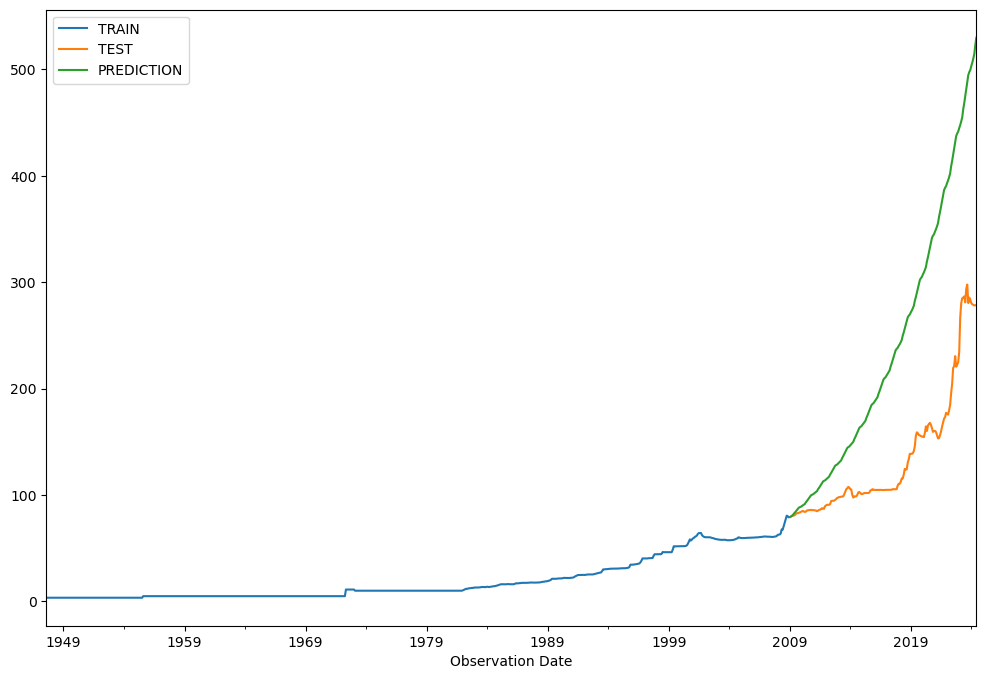

In [90]:
train_data['Observation Value'].plot(legend=True, label = 'TRAIN', figsize = (12,8))
test_data['Observation Value'].plot(legend=True, label = 'TEST')
test_predictions.plot(legend=True,label = 'PREDICTION')

<Axes: xlabel='Observation Date'>

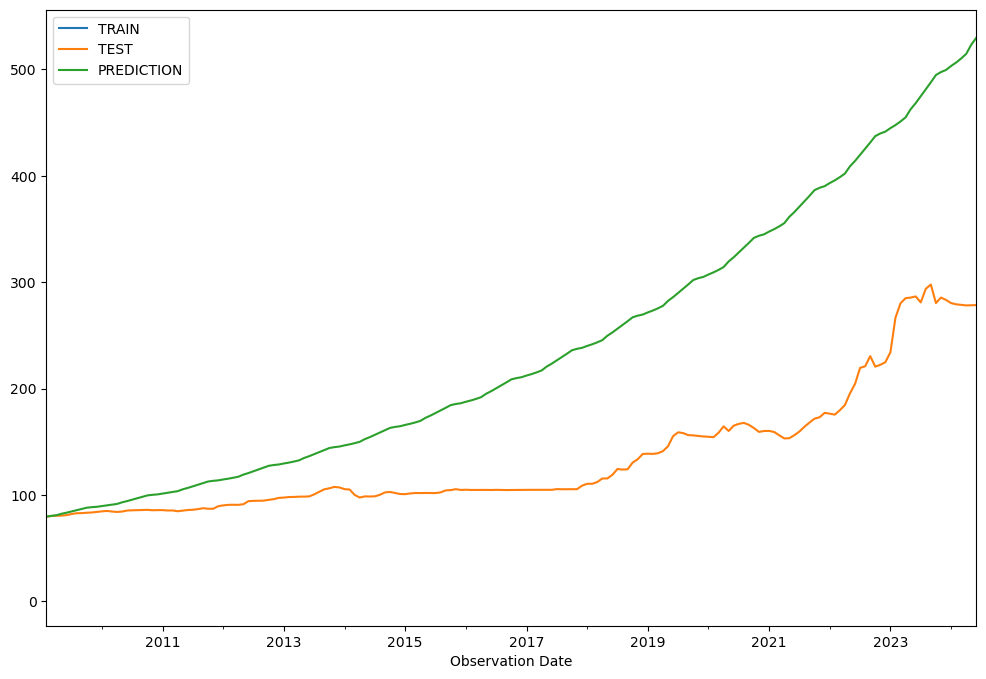

In [91]:
train_data['Observation Value'].plot(legend=True, label = 'TRAIN', figsize = (12,8))
test_data['Observation Value'].plot(legend=True, label = 'TEST')
test_predictions.plot(legend=True,label = 'PREDICTION',xlim = [test_data.index.min(),test_data.index.max()])

## Evaluating Predictions

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [93]:
test_data.describe()

Observation Value
count         185.000000
mean          134.541819
std            58.958680
min            79.448514
25%            97.187015
50%           104.770211
75%           159.131343
max           297.754172

In [94]:
mean_absolute_error(test_data,test_predictions)

104.12238360402145

In [95]:
mean_squared_error(test_data,test_predictions)

16330.393088141323

In [96]:
np.sqrt(mean_squared_error(test_data,test_predictions))

127.79042643383472

### Final Winter Holts Model

In [97]:
final_model = ExponentialSmoothing(df['Observation Value'],
                                    trend = 'mul',
                                    seasonal = 'mul',
                                    seasonal_periods = 12).fit()

In [98]:
forcast_predictions = final_model.forecast(36)

<Axes: xlabel='Observation Date'>

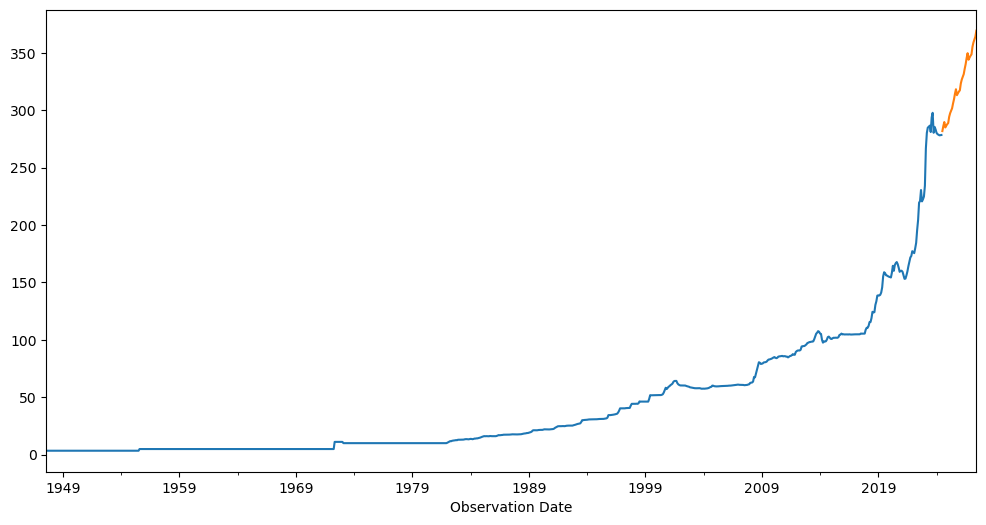

In [99]:
df['Observation Value'].plot(figsize=(12,6))
forcast_predictions.plot()

<Axes: >

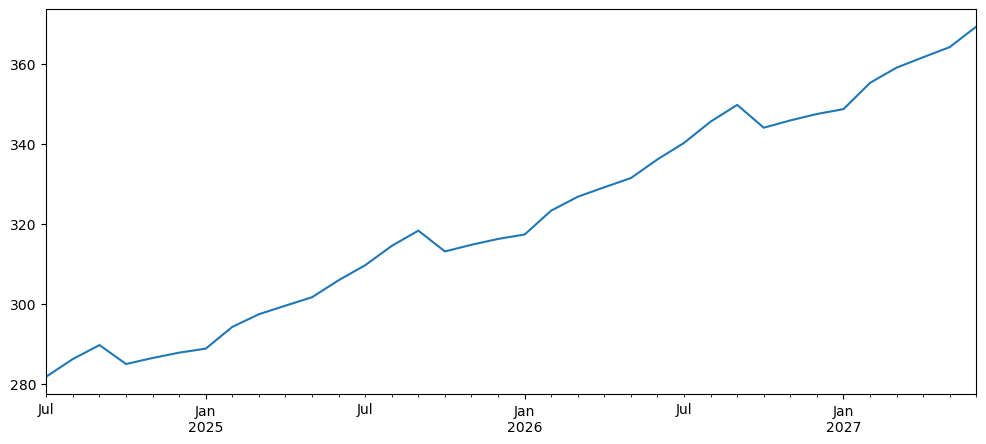

In [100]:
forcast_predictions.plot()

### Stationary and Non-Stationary Data

In [101]:
### This is non-stationary data as there is a trend or growth of increase

In [102]:
### Non stationary data can be made to look stationary using difference

In [103]:
from statsmodels.tsa.statespace.tools import diff

<Axes: xlabel='Observation Date'>

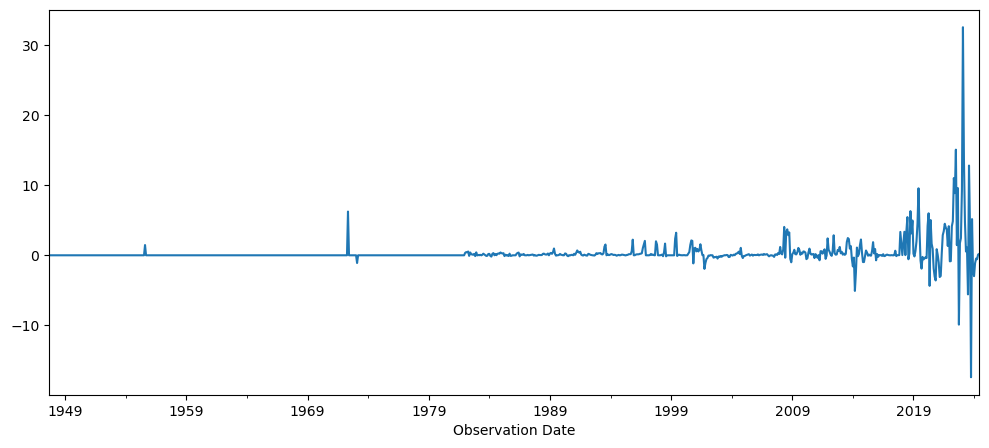

In [104]:
# df['Observation Value'] - df['Observation Value'].shift(1)
diff(df['Observation Value'],k_diff = 1).plot()

## ACF and PACF

In [105]:
import statsmodels.api as sm

In [106]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

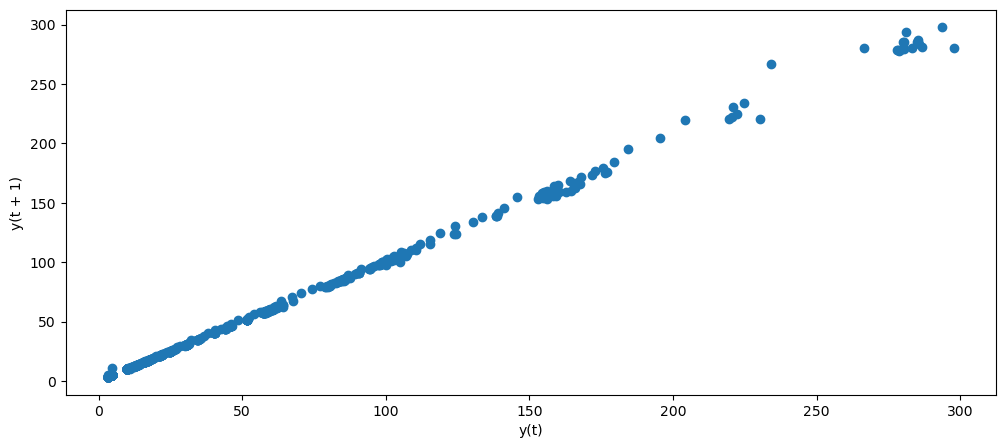

In [109]:
lag_plot(df['Observation Value'])

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

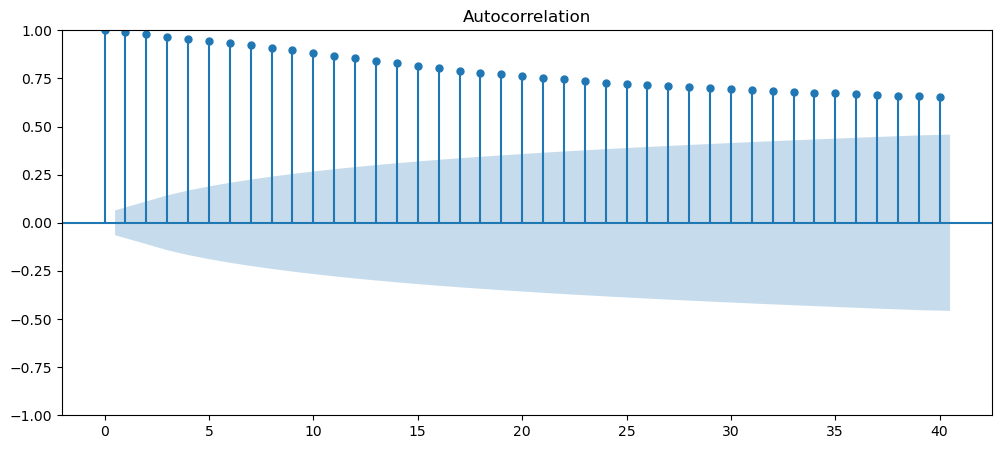

In [111]:
plot_acf(df,lags = 40);

In [112]:
# plot_pacf(df,lags = 40); # works best for stationary data

### Autoregression AR

In [113]:
from statsmodels.tsa.ar_model import AutoReg,ARResults

In [114]:
ar_model = AutoReg(train_data['Observation Value'],lags = 1)

In [115]:
AR1fit = ar_model.fit()

In [116]:
AR1fit.aic

1005.1253054036227

In [117]:
AR1fit.params

const                   0.000663
Observation Value.L1    1.005199
dtype: float64

In [118]:
start = len(train_data)

In [119]:
end = len(train_data) + len(test_data) - 1

In [120]:
start

738

In [121]:
end

922

In [122]:
AR1fit.predict(start=start,end=end)

2009-02-28     79.497416
2009-03-31     79.911362
2009-04-30     80.327460
2009-05-31     80.745722
2009-06-30     81.166158
                 ...    
2024-02-29    202.358329
2024-03-31    203.410993
2024-04-30    204.469129
2024-05-31    205.532766
2024-06-30    206.601933
Freq: M, Length: 185, dtype: float64

In [123]:
test_data

Observation Value
Observation Date                   
2009-02-28                79.448514
2009-03-31                80.235527
2009-04-30                80.395759
2009-05-31                80.526781
2009-06-30                80.957404
...                             ...
2024-02-29               279.181670
2024-03-31               278.704966
2024-04-30               278.142450
2024-05-31               278.250082
2024-06-30               278.438722

[185 rows x 1 columns]

In [124]:
predictions1 = AR1fit.predict(start=start,end=end)

In [125]:
predictions1 = predictions1.rename('AR(1) Predictions')

<Axes: xlabel='Observation Date'>

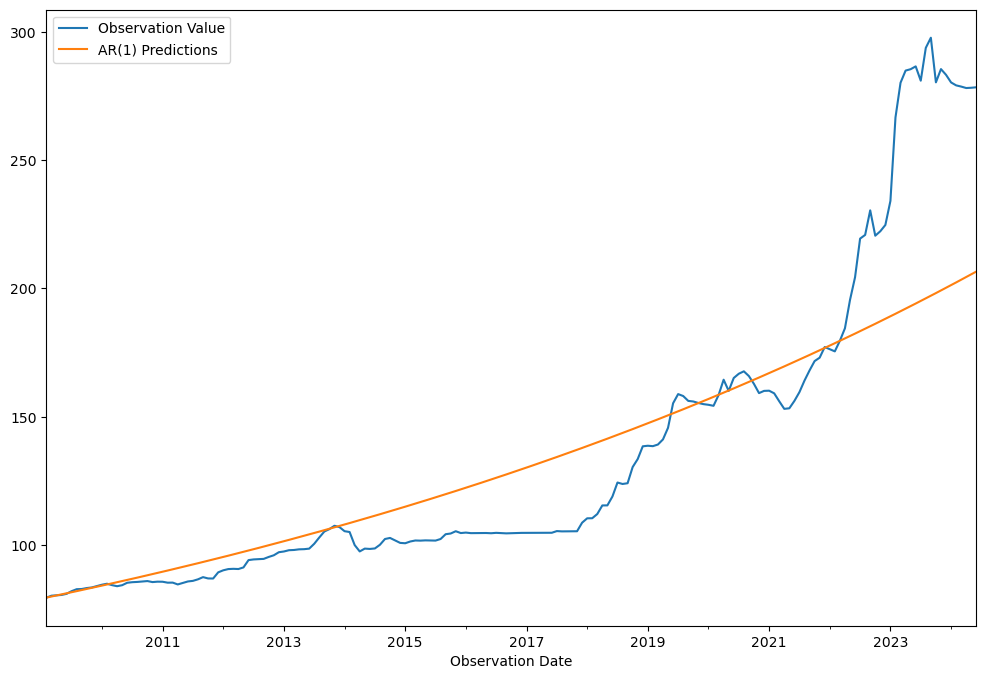

In [126]:
test_data.plot(figsize = (12,8),legend = True)
predictions1.plot(legend = True)

In [127]:
ar_model_1 = AutoReg(train_data['Observation Value'],lags = 2)

In [128]:
AR2fit = ar_model_1.fit()

In [129]:
AR2fit.params

const                   0.004294
Observation Value.L1    1.328187
Observation Value.L2   -0.324868
dtype: float64

In [130]:
predictions2 = AR2fit.predict(start,end)

In [131]:
predictions2 = predictions2.rename('AR(2) Predictions')

<Axes: xlabel='Observation Date'>

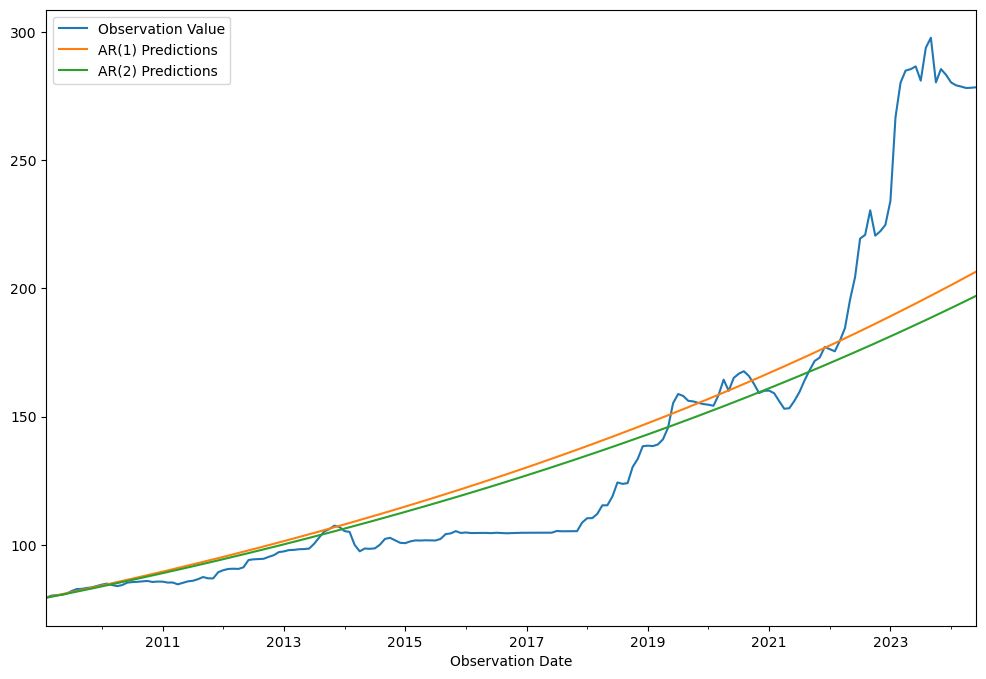

In [132]:
test_data.plot(figsize = (12,8),legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

In [133]:
# Define a range of lags to test
lag_range = range(1, 11)  # Example: testing lags from 1 to 10

# Store results
results = []

for lags in lag_range:
    # Create and fit the model
    ar_model_2 = AutoReg(train_data['Observation Value'], lags=lags)
    ARfit = ar_model_2.fit()

    # Extract coefficients and standard errors
    coefficients = ARfit.params
    standard_errors = ARfit.bse

    # Calculate t-statistics
    t_statistics = coefficients / standard_errors

    # Collect information
    results.append({
        'lags': lags,
        't_statistics': t_statistics,
        'aic': ARfit.aic,
        'bic': ARfit.bic
    })

# Convert results to DataFrame for easier inspection
results_df = pd.DataFrame(results)

### Best lags = 2

for index, row in results_df.iterrows():
    print(f"\nLag {row['lags']} - AIC: {row['aic']}, BIC: {row['bic']}")
    print("T-Statistics:")
    print(row['t_statistics'])


Lag 1 - AIC: 1005.1253054036227, BIC: 1018.9330690801908
T-Statistics:
const                      0.026974
Observation Value.L1    1148.382474
dtype: float64

Lag 2 - AIC: 925.6627187150849, BIC: 944.0676391900004
T-Statistics:
const                    0.184258
Observation Value.L1    38.066762
Observation Value.L2    -9.259717
dtype: float64

Lag 3 - AIC: 922.6640702703836, BIC: 945.6634227664478
T-Statistics:
const                    0.237853
Observation Value.L1    35.413821
Observation Value.L2    -3.625039
Observation Value.L3    -2.182975
dtype: float64

Lag 4 - AIC: 921.8013482670859, BIC: 949.392402438773
T-Statistics:
const                    0.282696
Observation Value.L1    35.204459
Observation Value.L2    -3.806689
Observation Value.L3    -0.059399
Observation Value.L4    -1.619827
dtype: float64

Lag 5 - AIC: 922.5847700559988, BIC: 954.7647899692054
T-Statistics:
const                    0.270659
Observation Value.L1    35.204026
Observation Value.L2    -3.783765
Observa

In [134]:
ar_model_2 = AutoReg(train_data['Observation Value'], lags=8)
ARfit = ar_model_2.fit()

In [135]:
ARfit.params

const                   0.007105
Observation Value.L1    1.299849
Observation Value.L2   -0.229460
Observation Value.L3    0.004142
Observation Value.L4   -0.112071
Observation Value.L5    0.081448
Observation Value.L6   -0.056670
Observation Value.L7   -0.047579
Observation Value.L8    0.063290
dtype: float64

In [136]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) predictions')

In [137]:
labels = ['AR1','AR2','AR8']

In [138]:
preds = [predictions1,predictions2,predictions8]

In [139]:
for i in range(3):
    #np.sqrt()
    error = mean_squared_error(test_data['Observation Value'],preds[i])
    print(f'{labels[i]} MSE was "{error}')

AR1 MSE was "869.9741847988261
AR2 MSE was "999.8210537791076
AR8 MSE was "1241.26197878445


<Axes: xlabel='Observation Date'>

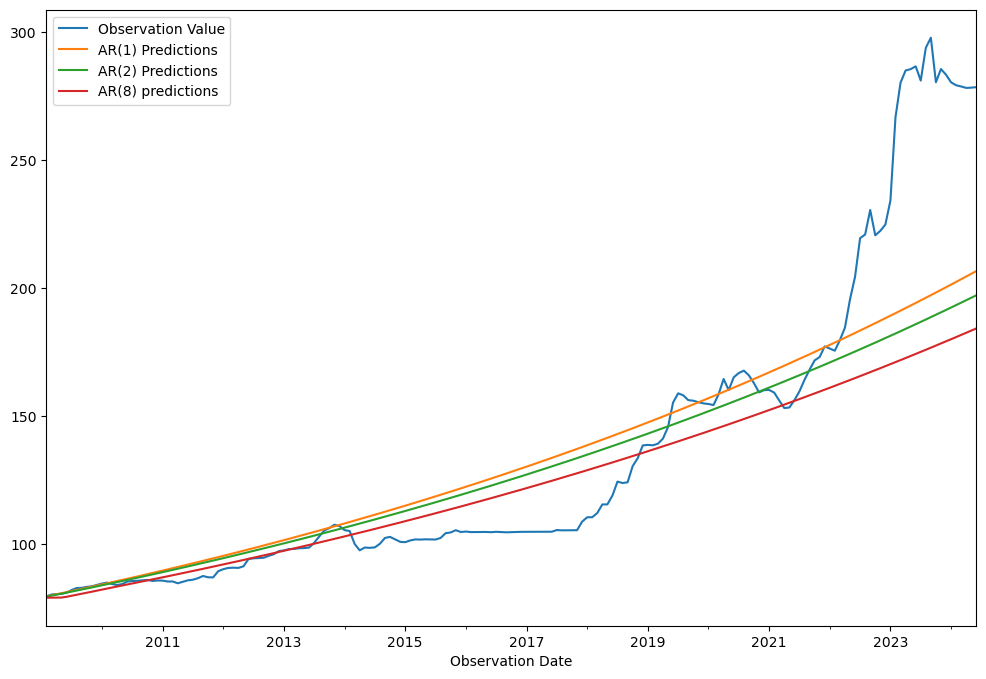

In [140]:
test_data.plot(figsize=(12,8),legend= True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions8.plot(legend=True)

### Final AR Model

In [141]:
# Forcasting Future

final_model = AutoReg(df['Observation Value'],lags = 2)

ARfit = final_model.fit()

forcasted_values = ARfit.predict(start = len(df), end = len(df) + 36).rename('Forecast')

<Axes: xlabel='Observation Date'>

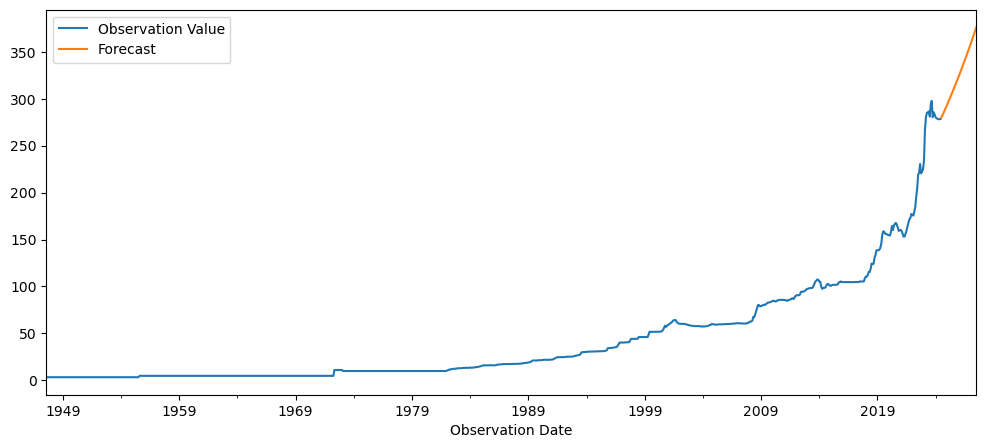

In [142]:
df['Observation Value'].plot(legend = True)
forcasted_values.plot(legend = True)

<Axes: >

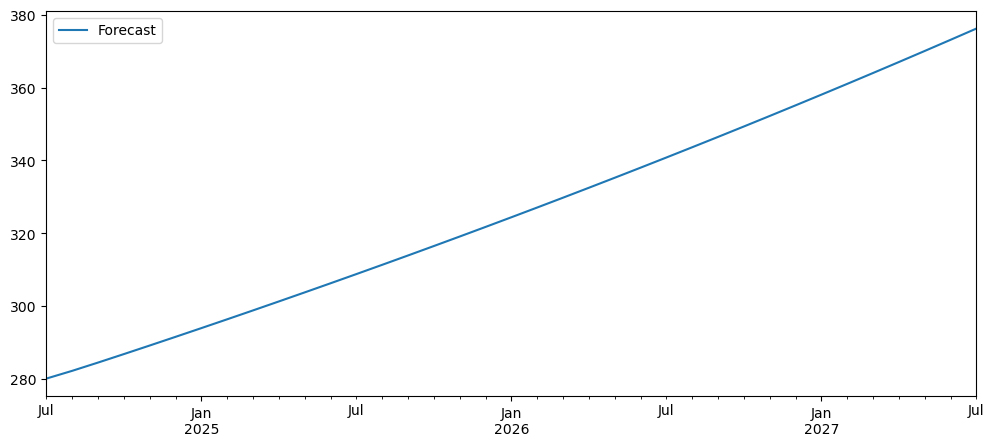

In [143]:
forcasted_values.plot(legend = True)

 ## Descriptive Statistics and Tests

### Dicky Fuller Test

In [144]:
from statsmodels.tsa.stattools import adfuller

In [145]:
adfuller(df['Observation Value'])

(5.098684717206168,
 1.0,
 21,
 901,
 {'1%': -3.437628610719785,
  '5%': -2.8647531504389767,
  '10%': -2.5684808963896324},
 3350.1782454450845)

In [146]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [147]:
dftest = adfuller(df['Observation Value'])
dfout = pd.Series(dftest[0:4],index = ['ADF Test Statistic','p-value','# Lags Used','# Observations'])

In [148]:
dfout

ADF Test Statistic      5.098685
p-value                 1.000000
# Lags Used            21.000000
# Observations        901.000000
dtype: float64

In [149]:
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [150]:
dfout

ADF Test Statistic        5.098685
p-value                   1.000000
# Lags Used              21.000000
# Observations          901.000000
critical value (1%)      -3.437629
critical value (5%)      -2.864753
critical value (10%)     -2.568481
dtype: float64

In [151]:
def adf_test(series,title=''): 
    """
    Pass in a time series and an optional title,returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test : {title}')
    result = adfuller(series.dropna(),autolag='AIC') #.dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index = labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())                           #.to_string() removes the line"dtype :float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has unit root and is non-stationary")
        

In [152]:
adf_test(df['Observation Value'])

Augmented Dickey-Fuller Test : 
ADF test statistic        5.098685
p-value                   1.000000
# lags used              21.000000
# observations          901.000000
critical value (1%)      -3.437629
critical value (5%)      -2.864753
critical value (10%)     -2.568481
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has unit root and is non-stationary


### Seasonality Effects

In [153]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

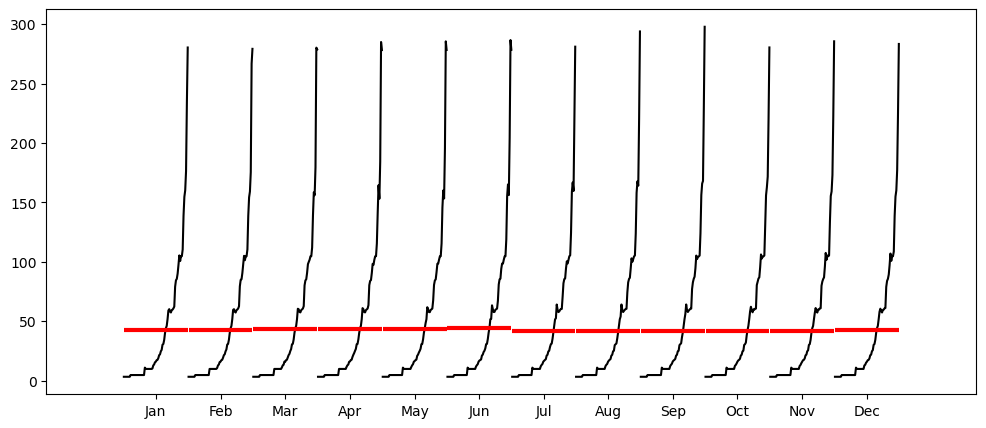

In [154]:
month_plot(df['Observation Value']);

In [155]:
dfq = df['Observation Value'].resample(rule='Q').mean()

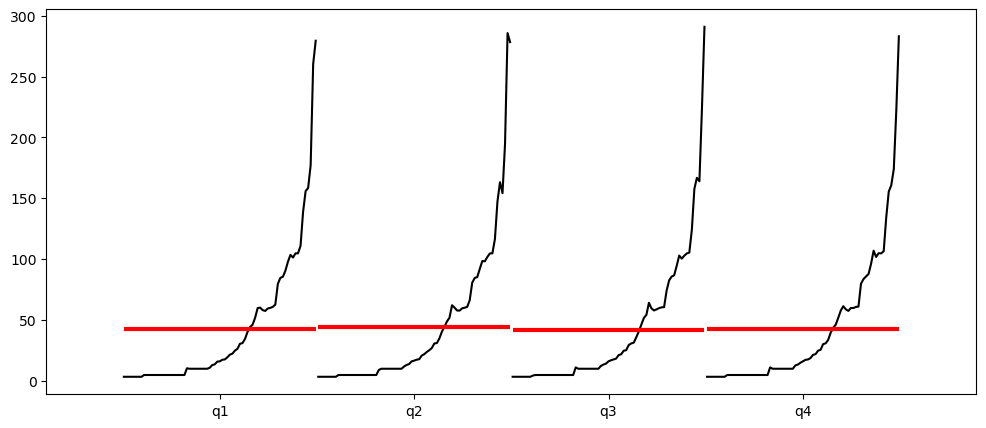

In [156]:
quarter_plot(dfq);

In [157]:
### Thus Seasonality is present , because of similar red lines

## AutoArima

In [158]:
from pmdarima import auto_arima

In [159]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [160]:
stepwise_fit = auto_arima(df['Observation Value'],start_p = 0,start_q = 0, max_p = 4,
                          max_q = 4, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=4035.064, Time=0.90 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=4036.190, Time=0.14 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=3881.681, Time=0.35 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=3719.641, Time=0.40 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=3717.708, Time=0.20 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=3719.644, Time=0.59 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=3658.419, Time=0.40 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=3659.447, Time=0.76 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=3659.357, Time=0.76 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=3658.165, Time=1.45 sec
 ARIMA(1,2,1)(2,0,1)[12]             : AIC=3656.292, Time=2.81 sec
 ARIMA(1,2,1)(2,0,0)[12]             : AIC=3658.894, Time=2.10 sec
 ARIMA(1,2,1)(2,0,2)[12]             : AIC=3657.162, Time=4.60 sec
 ARIMA(1,2,1)(1,0,2)[12]

In [161]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  923
Model:             SARIMAX(4, 2, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1807.246
Date:                                 Fri, 26 Jul 2024   AIC                           3630.491
Time:                                         10:36:00   BIC                           3669.095
Sample:                                     08-31-1947   HQIC                          3645.222
                                          - 06-30-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2441      0.012     20.245      0.000       0.220       0.268
ar.L2          0.0193      0.014      1.404      0.160      -0.008       0.046
ar.L3          0.0313      0.011      2.731      0.006       0.009       0.054
ar.L4         -0.2039      0.009    -21.994      0.000      -0.222      -0.186
ma.L1         -0.9511      0.003   -336.780      0.000      -0.957      -0.946
ma.S.L12      -0.0097      0.012     -0.805      0.421      -0.033       0.014
ma.S.L24      -0.2377      0.028     -8.419      0.000      -0.293      -0.182
sigma2         2.9518      0.031     96.579      0.000       2.892       3.012
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            282223.51
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              54.83   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        88.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA

In [162]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [163]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

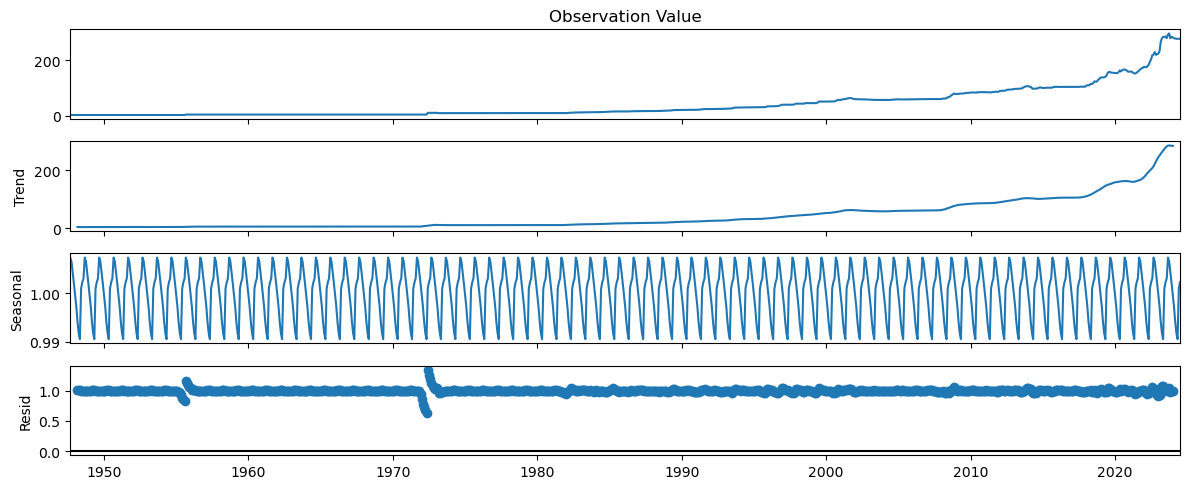

In [165]:
result = seasonal_decompose(df['Observation Value'],model = 'mul')
result.plot();

In [166]:
auto_arima(df['Observation Value'],seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  923
Model:               SARIMAX(5, 2, 1)   Log Likelihood               -1807.257
Date:                Fri, 26 Jul 2024   AIC                           3628.514
Time:                        10:36:37   BIC                           3662.292
Sample:                    08-31-1947   HQIC                          3641.403
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0325      0.027     -1.194      0.232      -0.086       0.021
ar.L2         -0.0995      0.014     -7.080      0.000      -0.127      -0.072
ar.L3         -0.1081      0.013     -8.330      0.000      -0.134      -0.083
ar.L4         -0.3054      0.011    -26.735      0.000      -0.328      -0.283
ar.L5         -0.1475      0.016     -9.255      0.000      -0.179      -0.116
ma.L1         -0.6616      0.025    -26.955      0.000      -0.710      -0.613
sigma2         2.9597      0.027    108.472      0.000       2.906       3.013
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            389206.64
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              51.48   Skew:                            -1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       103.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
df['Diff_1'] = diff(df['Observation Value'],k_diff = 1)

In [168]:
adf_test(df['Diff_1'])

Augmented Dickey-Fuller Test : 
ADF test statistic     -8.529670e+00
p-value                 1.045941e-13
# lags used             2.100000e+01
# observations          9.000000e+02
critical value (1%)    -3.437637e+00
critical value (5%)    -2.864757e+00
critical value (10%)   -2.568483e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


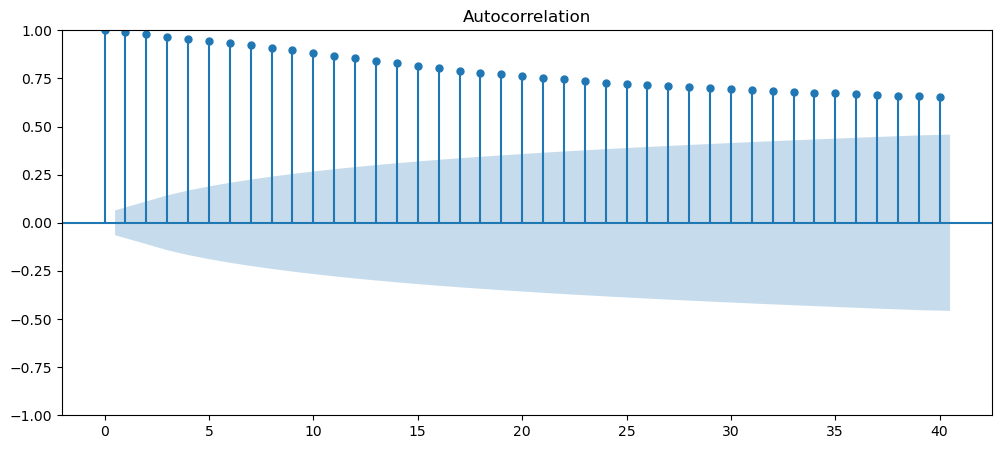

In [169]:
plot_acf(df['Observation Value'],lags = 40);

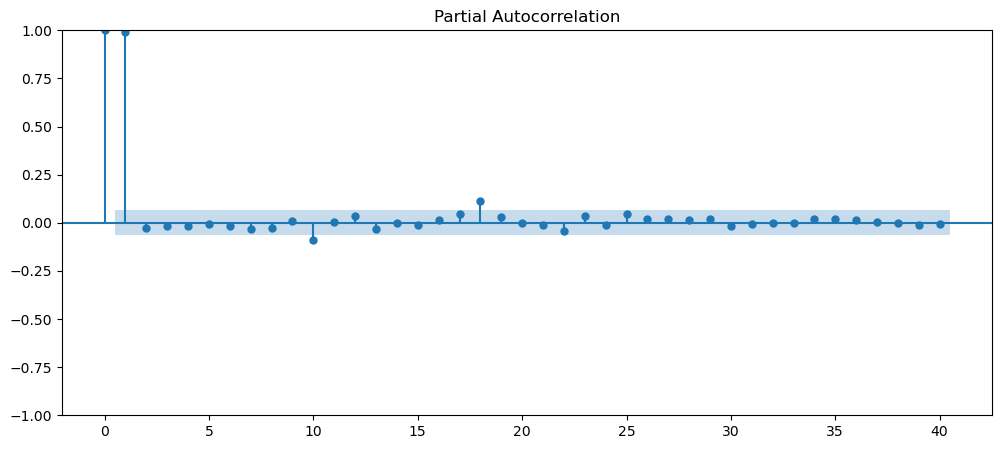

In [170]:
plot_pacf(df['Observation Value'],lags = 40);

In [171]:
#AR = 1
# I = 1
# MA = 0 or 1 # Less error

In [172]:
stepwise_fit = auto_arima(df['Observation Value'],start_p = 0, start_q = 0, max_p = 2,
                          max_q = 2, seasonal = False, trace = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4038.190, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3883.106, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3719.707, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4036.190, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3658.734, Time=0.84 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3656.604, Time=1.38 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3833.401, Time=0.39 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3657.357, Time=1.61 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3656.425, Time=0.61 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3658.419, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3831.401, Time=0.19 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.50 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3881.106, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  923
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1824.213
Date:                Fri, 26 Jul 2024   AIC                           3656.425
Time:                        10:36:49   BIC                           3675.727
Sample:                    08-31-1947   HQIC                          3663.791
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2749      0.010     27.342      0.000       0.255       0.295
ar.L2          0.0673      0.014      4.851      0.000       0.040       0.094
ma.L1         -0.9817      0.002   -455.086      0.000      -0.986      -0.977
sigma2         3.0668      0.023    134.376      0.000       3.022       3.112
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            467411.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              59.49   Skew:                             3.46
Prob(H) (two-sided):                  0.00   Kurtosis:                       113.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
len(df)

923

In [174]:
from statsmodels.tsa.arima.model import ARIMA

In [175]:
ARIMA_model = ARIMA(train_data['Observation Value'],order = (2,2,1))
results = ARIMA_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Observation Value   No. Observations:                  738
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -460.985
Date:                Fri, 26 Jul 2024   AIC                            929.969
Time:                        10:36:50   BIC                            948.374
Sample:                    08-31-1947   HQIC                           937.067
                         - 01-31-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3006      0.013     23.446      0.000       0.275       0.326
ar.L2          0.0850      0.014      6.158      0.000       0.058       0.112
ma.L1         -0.9889      0.005   -183.699      0.000      -0.999      -0.978
sigma2         0.2041      0.002    109.395      0.000       0.200       0.208
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            125186.36
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              42.87   Skew:                             5.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

predictions = results.predict(start=start,end=end,typ='levels').rename('ARIMA(2,2,1) Predictions')

In [177]:
predictions

2009-02-28     79.230210
2009-03-31     79.468417
2009-04-30     79.733298
2009-05-31     80.014157
2009-06-30     80.302086
                 ...    
2024-02-29    132.142032
2024-03-31    132.436611
2024-04-30    132.731191
2024-05-31    133.025771
2024-06-30    133.320350
Freq: M, Name: ARIMA(2,2,1) Predictions, Length: 185, dtype: float64

In [178]:
test_data

Observation Value
Observation Date                   
2009-02-28                79.448514
2009-03-31                80.235527
2009-04-30                80.395759
2009-05-31                80.526781
2009-06-30                80.957404
...                             ...
2024-02-29               279.181670
2024-03-31               278.704966
2024-04-30               278.142450
2024-05-31               278.250082
2024-06-30               278.438722

[185 rows x 1 columns]

<Axes: xlabel='Observation Date'>

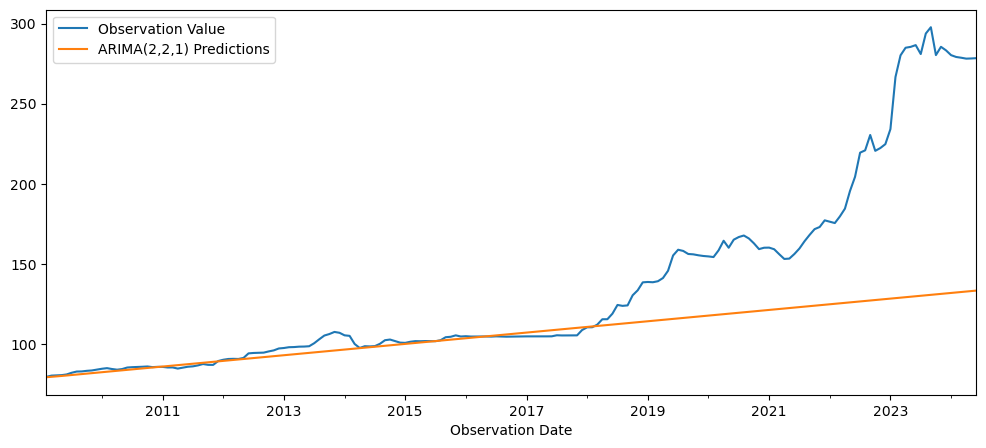

In [179]:
test_data['Observation Value'].plot(legend=True)
predictions.plot(legend=True)

In [180]:
from statsmodels.tools.eval_measures import rmse

In [181]:
error = rmse(test_data['Observation Value'],predictions)

In [182]:
error

53.90529624407814

In [183]:
test_data['Observation Value'].mean()

134.5418194718919

In [184]:
predictions.mean()

106.22020891985828

### Final ARIMA Model

In [185]:
final_ARIMA_model = ARIMA(df['Observation Value'],order = (2,2,1))

In [186]:
results = final_ARIMA_model.fit()

In [187]:
fcast = results.predict(start = len(df),end = len(df) + 36, typ = 'levels').rename('ARIMA(2,2,1) Forecast')

<Axes: xlabel='Observation Date'>

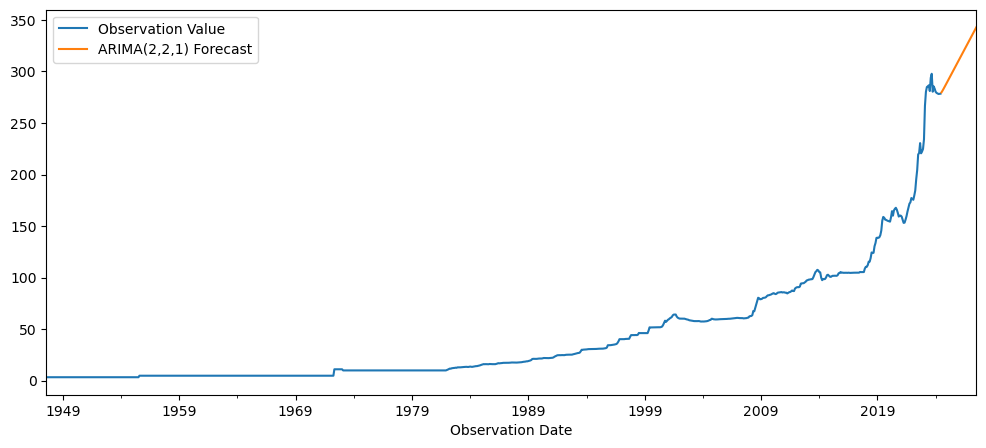

In [188]:
df['Observation Value'].plot(legend=True)
fcast.plot(legend=True)

<Axes: >

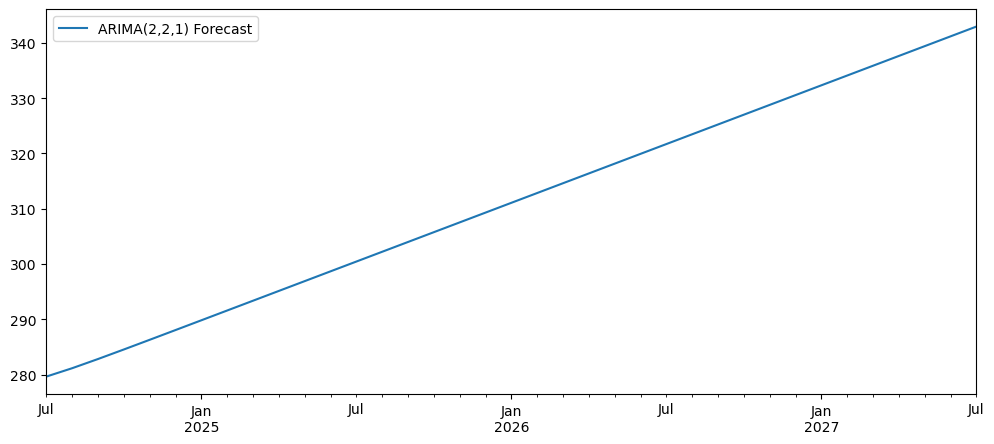

In [189]:
fcast.plot(legend=True)

## SARIMA

In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

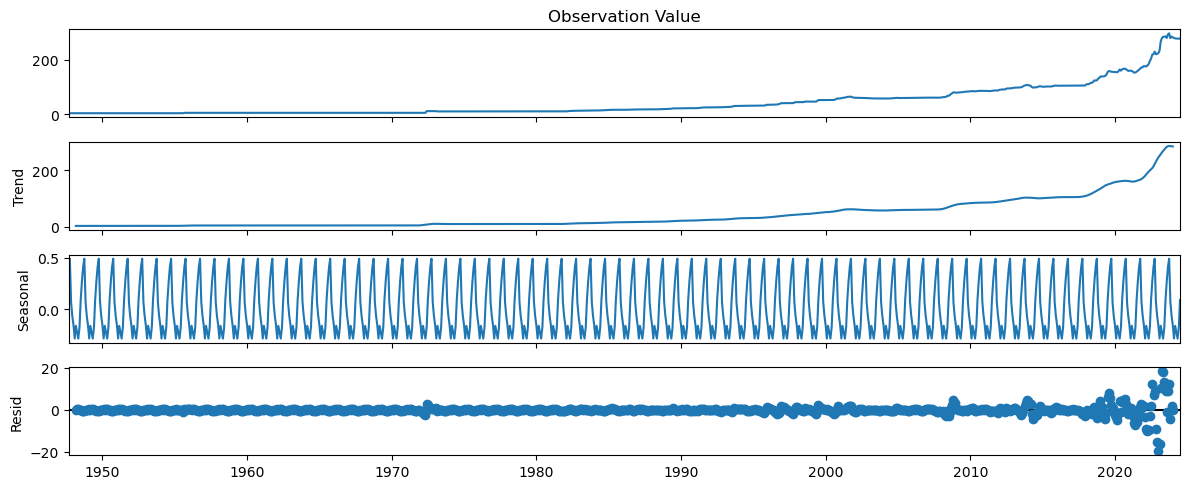

In [191]:
result = seasonal_decompose(df['Observation Value'],model = 'add')
result.plot();

<Axes: xlabel='Observation Date'>

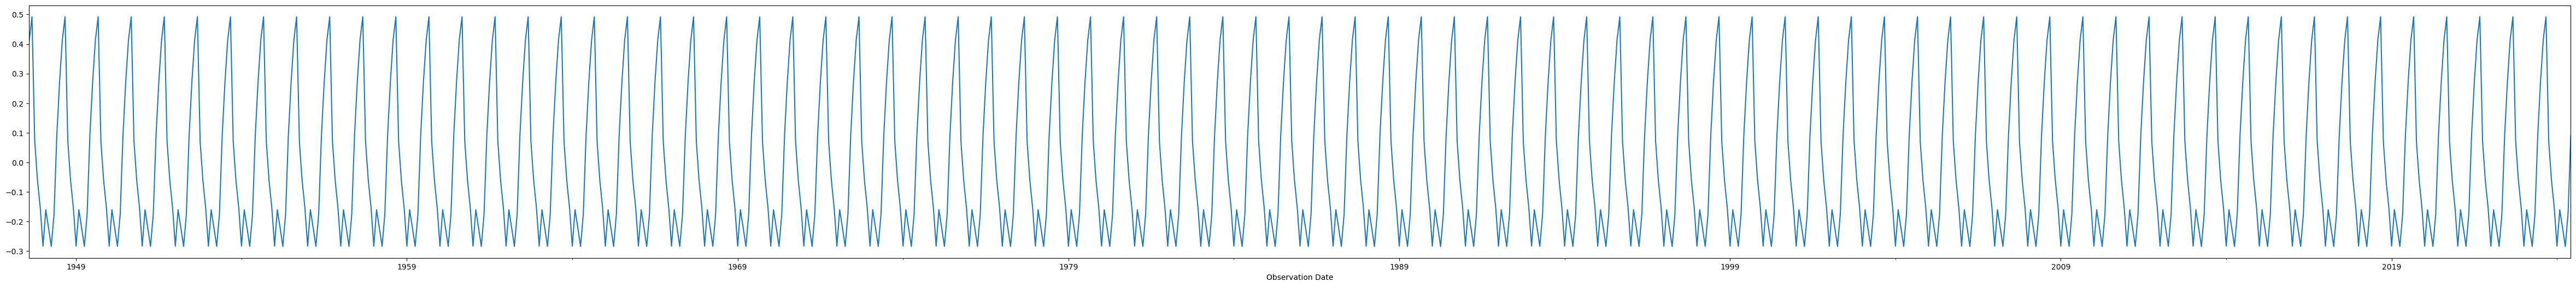

In [192]:
result.seasonal.plot(figsize = (60,6))

In [193]:
auto_arima(df['Observation Value'],seasonal = True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  923
Model:             SARIMAX(5, 2, 1)x(2, 0, 1, 12)   Log Likelihood               -1802.321
Date:                            Fri, 26 Jul 2024   AIC                           3624.642
Time:                                    10:41:15   BIC                           3672.896
Sample:                                08-31-1947   HQIC                          3643.055
                                     - 06-30-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.023     -0.056      0.955      -0.047       0.044
ar.L2         -0.1127      0.014     -8.094      0.000      -0.140      -0.085
ar.L3         -0.0783      0.017     -4.683      0.000      -0.111      -0.046
ar.L4         -0.3039      0.010    -29.247      0.000      -0.324      -0.284
ar.L5         -0.1445      0.017     -8.703      0.000      -0.177      -0.112
ma.L1         -0.7079      0.020    -35.002      0.000      -0.748      -0.668
ar.S.L12      -0.5231      0.176     -2.980      0.003      -0.867      -0.179
ar.S.L24      -0.1949      0.030     -6.397      0.000      -0.255      -0.135
ma.S.L12       0.5182      0.172      3.006      0.003       0.180       0.856
sigma2         2.9236      0.030     98.388      0.000       2.865       2.982
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):            336181.36
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              51.04   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        96.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [194]:
SARIMA_model = SARIMAX(train_data['Observation Value'],order=(5,2,1),
                       seasonal_order=(2, 0, 1, 12))

In [195]:
results = SARIMA_model.fit()

In [196]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Observation Value   No. Observations:                  738
Model:             SARIMAX(5, 2, 1)x(2, 0, 1, 12)   Log Likelihood                -457.170
Date:                            Fri, 26 Jul 2024   AIC                            934.340
Time:                                    10:41:28   BIC                            980.352
Sample:                                08-31-1947   HQIC                           952.085
                                     - 01-31-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2988      0.013     22.286      0.000       0.273       0.325
ar.L2          0.0705      0.017      4.251      0.000       0.038       0.103
ar.L3          0.0711      0.019      3.736      0.000       0.034       0.108
ar.L4         -0.0420      0.023     -1.789      0.074      -0.088       0.004
ar.L5          0.0369      0.028      1.305      0.192      -0.019       0.092
ma.L1         -0.9908      0.006   -165.895      0.000      -1.003      -0.979
ar.S.L12      -0.7249      0.278     -2.603      0.009      -1.271      -0.179
ar.S.L24       0.0681      0.044      1.554      0.120      -0.018       0.154
ma.S.L12       0.7586      0.275      2.757      0.006       0.219       1.298
sigma2         0.2019      0.002    109.795      0.000       0.198       0.206
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            129991.61
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              41.68   Skew:                             5.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

<Axes: xlabel='Observation Date'>

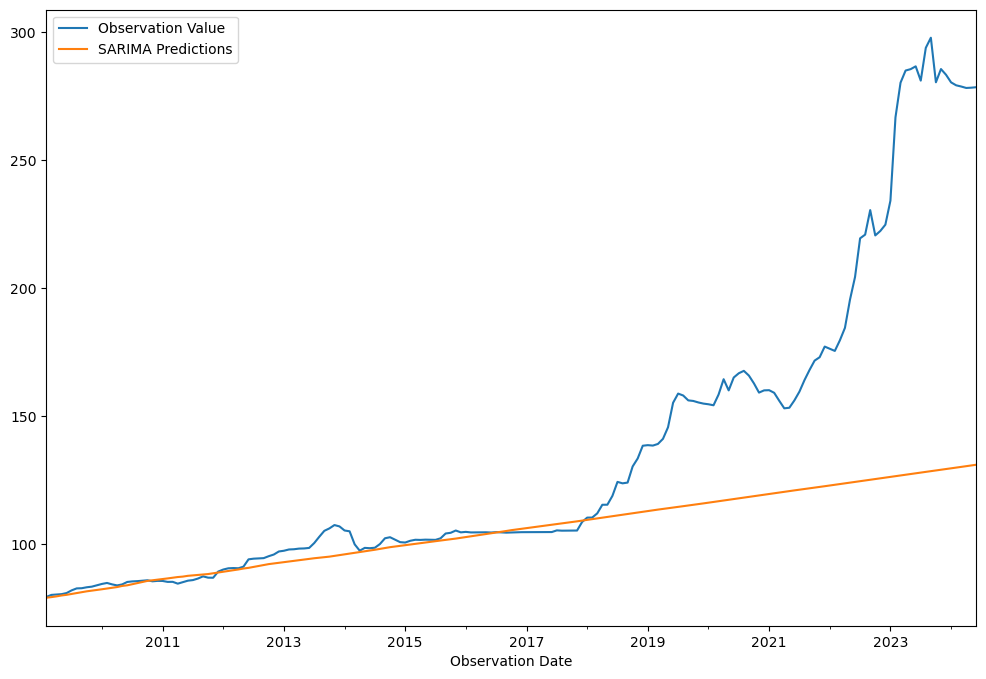

In [198]:
test_data['Observation Value'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

<Axes: >

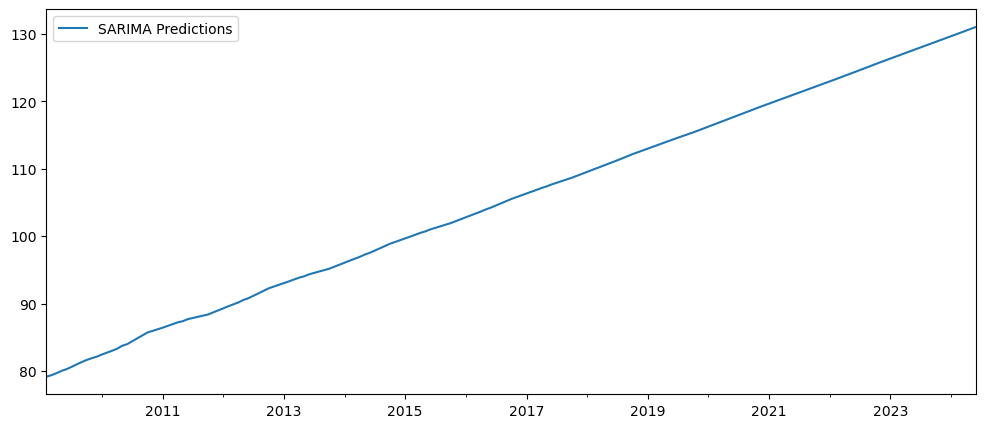

In [199]:
predictions.plot(legend=True)

In [200]:
error = rmse(test_data['Observation Value'],predictions)

In [201]:
error

54.88596962677467

In [202]:
test_data['Observation Value'].mean()

134.5418194718919

### Final SARIMA Model

In [203]:
final_SARIMA_model = SARIMAX(df['Observation Value'],order=(5,2,1),seasonal_order=(2, 0, 1, 12))
results = final_SARIMA_model.fit()

In [204]:
fcast = results.predict(len(df),len(df) + 36,typ = 'levels').rename('SARIMA FORECAST')

<Axes: xlabel='Observation Date'>

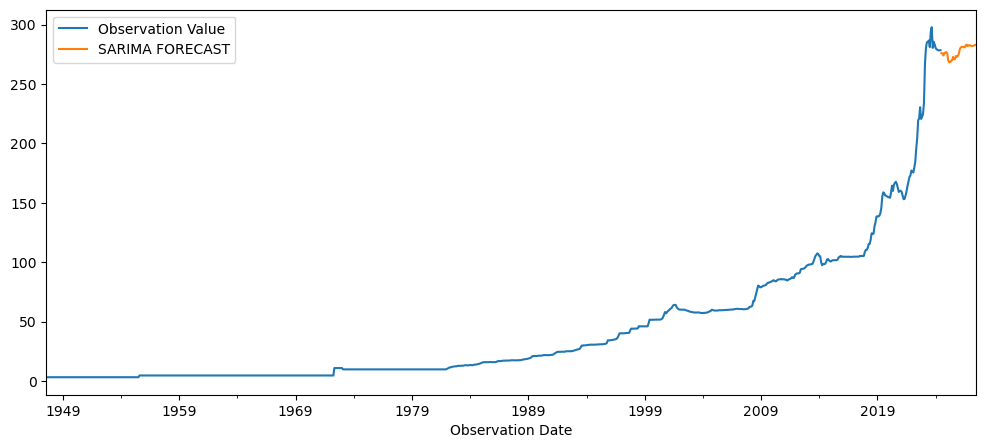

In [205]:
df['Observation Value'].plot(legend=True)
fcast.plot(legend=True)

<Axes: >

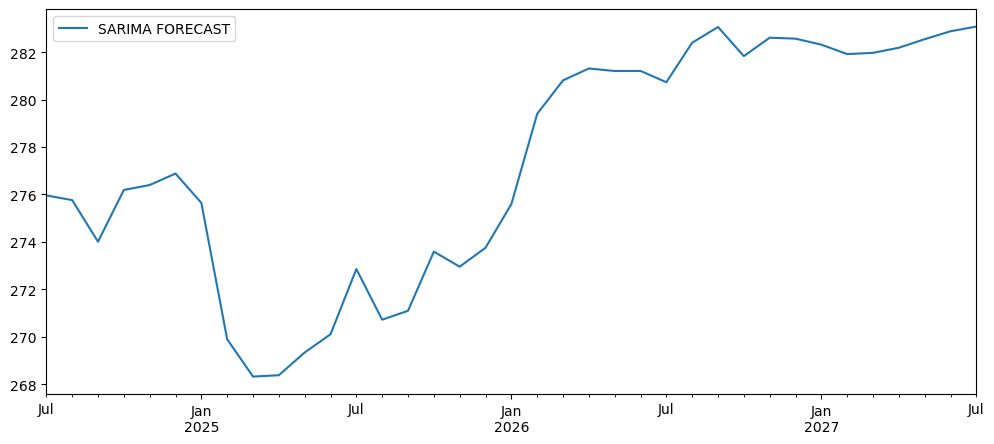

In [206]:
fcast.plot(legend=True)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 923 entries, 1947-08-31 to 2024-06-30
Freq: M
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Observation Value  923 non-null    float64
 1   Diff_1             922 non-null    float64
dtypes: float64(2)
memory usage: 53.9 KB


## RNN

In [236]:
df = df.drop('Diff_1',axis=1)

<Axes: xlabel='Observation Date'>

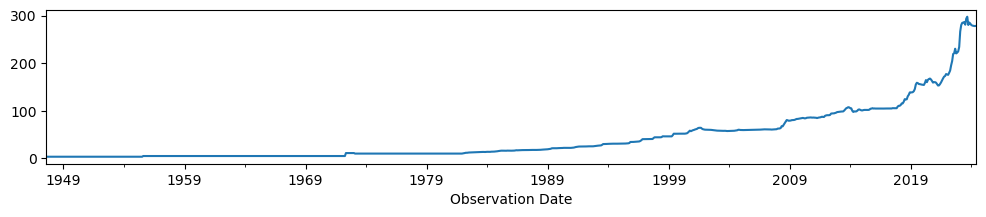

In [237]:
results = seasonal_decompose(df['Observation Value'])
results.observed.plot(figsize=(12,2))

<Axes: xlabel='Observation Date'>

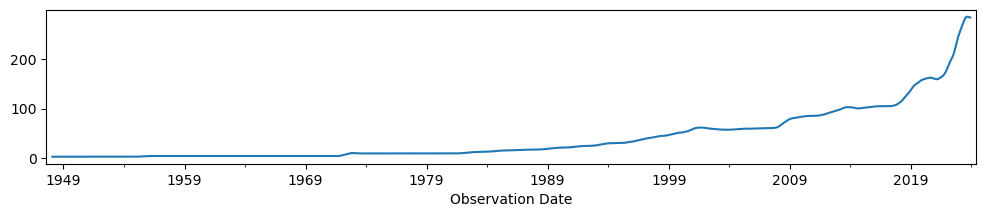

In [238]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='Observation Date'>

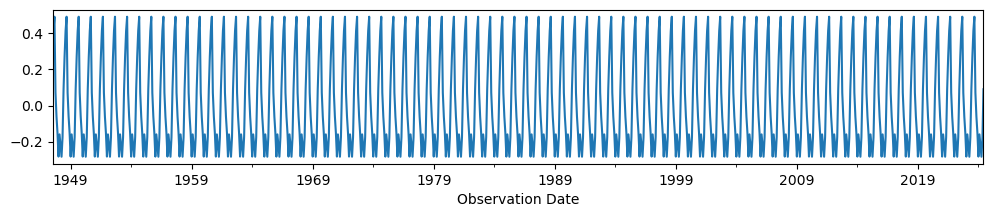

In [239]:
results.seasonal.plot(figsize=(12,2))

<Axes: xlabel='Observation Date'>

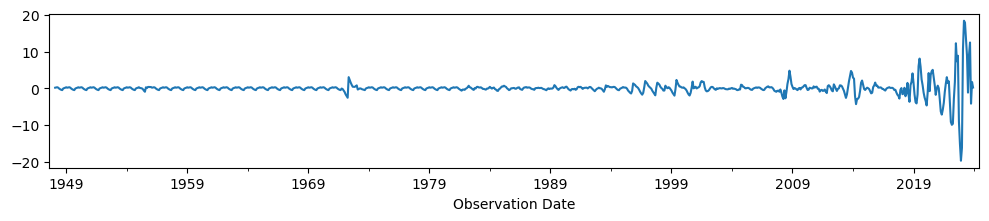

In [240]:
results.resid.plot(figsize=(12,2))

### Train Test Split

In [241]:
len(df)

923

In [242]:
923-60

863

In [243]:
train = df.iloc[:863]
test = df.iloc[863:]

In [244]:
len(test)

60

### Scale Data

In [245]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
scaler = MinMaxScaler()

In [247]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [248]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator


In [249]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [250]:
scaled_train

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [251]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [252]:
len(scaled_train)

863

In [253]:
len(generator) # n_input = 2

861

In [254]:
scaled_train

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [255]:
# What does the first batch look like?
X,y = generator[0]

In [256]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0. 0.]
Predict this y: 
 [[0.]]


In [264]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [265]:
# What does the first batch look like?
X,y = generator[0]

In [266]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predict this y: 
 [[0.]]


### Create the Model

In [260]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [267]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=True))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [268]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 12, 150)             │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 12, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 12, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12, 1)               │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452,551 (1.73 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [269]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 0.0146
Epoch 2/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0012
Epoch 3/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0011
Epoch 4/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 8.5756e-04
Epoch 5/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 0.0013
Epoch 6/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 0.0010
Epoch 7/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 5.4153e-04
Epoch 8/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 7.9394e-04
Epoch 9/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 5.7769e-04
Epoch 10/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 5.9254e-04
Epoch 11/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 6.0485e-04
Epoch 12/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 5.3641e-04
Epoch 13/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 5.4327e-04
Epoch 14/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - loss: 7.42

In [270]:
model.history.history.keys()

dict_keys(['loss'])

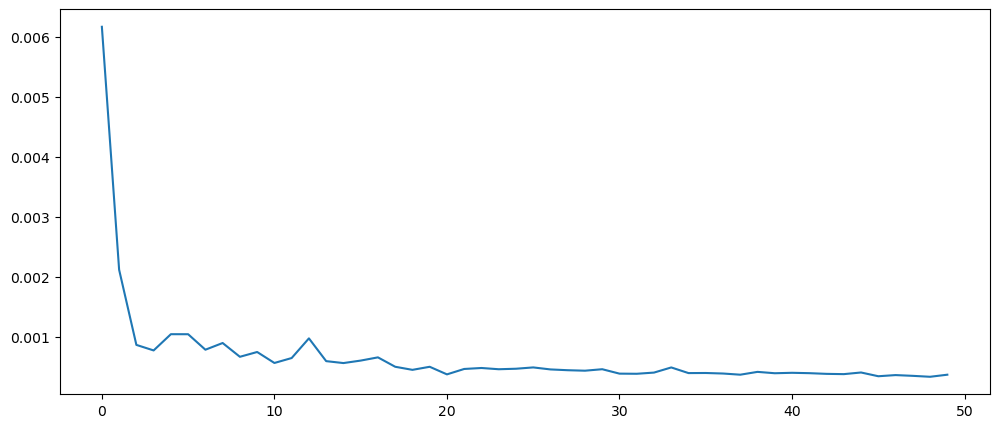

In [271]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test Data

In [278]:
first_eval_batch = scaled_train[-12:]

In [279]:
first_eval_batch

array([[0.79665944],
       [0.79294858],
       [0.79487068],
       [0.83634367],
       [0.85688502],
       [0.88957633],
       [0.8910494 ],
       [0.88996771],
       [0.89415106],
       [0.90730235],
       [0.93710143],
       [1.        ]])

In [280]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [281]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


array([[[0.92003286],
        [0.8895933 ],
        [0.94871587],
        [1.0407028 ],
        [1.0413654 ],
        [1.083925  ],
        [1.0045909 ],
        [0.96980476],
        [0.92929894],
        [0.9259801 ],
        [0.9597898 ],
        [1.0702982 ]]], dtype=float32)

In [282]:
scaled_test[0]

array([1.02356579])

In [283]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [284]:
current_batch.shape

(1, 12, 1)

In [285]:
current_batch

array([[[0.79665944],
        [0.79294858],
        [0.79487068],
        [0.83634367],
        [0.85688502],
        [0.88957633],
        [0.8910494 ],
        [0.88996771],
        [0.89415106],
        [0.90730235],
        [0.93710143],
        [1.        ]]])

In [286]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.79294858],
        [ 0.79487068],
        [ 0.83634367],
        [ 0.85688502],
        [ 0.88957633],
        [ 0.8910494 ],
        [ 0.88996771],
        [ 0.89415106],
        [ 0.90730235],
        [ 0.93710143],
        [ 1.        ],
        [99.        ]]])

In [288]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0,0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [289]:
test_predictions

[array([0.92003286], dtype=float32),
 array([0.9124031], dtype=float32),
 array([0.91633934], dtype=float32),
 array([1.0068846], dtype=float32),
 array([1.0555792], dtype=float32),
 array([1.1371596], dtype=float32),
 array([1.1409357], dtype=float32),
 array([1.138162], dtype=float32),
 array([1.148917], dtype=float32),
 array([1.1832535], dtype=float32),
 array([1.2634659], dtype=float32),
 array([1.44382], dtype=float32),
 array([1.2171149], dtype=float32),
 array([1.1967478], dtype=float32),
 array([1.207228], dtype=float32),
 array([1.4644275], dtype=float32),
 array([1.6153426], dtype=float32),
 array([1.8836975], dtype=float32),
 array([1.8965268], dtype=float32),
 array([1.887099], dtype=float32),
 array([1.9238358], dtype=float32),
 array([2.042964], dtype=float32),
 array([2.3290012], dtype=float32),
 array([2.9892256], dtype=float32),
 array([2.1625705], dtype=float32),
 array([2.0903997], dtype=float32),
 array([2.1274545], dtype=float32),
 array([3.0641658], dtype=float32

In [290]:
scaled_test

array([[1.02356579],
       [1.01861207],
       [1.00610312],
       [1.004607  ],
       [1.000779  ],
       [0.99783413],
       [0.99609748],
       [0.99351235],
       [1.02104826],
       [1.06047219],
       [1.03177294],
       [1.06485936],
       [1.07577584],
       [1.08198799],
       [1.069797  ],
       [1.04969638],
       [1.02608359],
       [1.0317915 ],
       [1.03227878],
       [1.02555109],
       [1.005138  ],
       [0.98570334],
       [0.98712447],
       [1.0060201 ],
       [1.02864591],
       [1.05825071],
       [1.08429378],
       [1.1082377 ],
       [1.11699579],
       [1.14431472],
       [1.13861834],
       [1.13316509],
       [1.16037966],
       [1.19239258],
       [1.2649148 ],
       [1.32327327],
       [1.42245459],
       [1.43199264],
       [1.49504069],
       [1.42992686],
       [1.44136571],
       [1.45750328],
       [1.51919546],
       [1.73336133],
       [1.82238325],
       [1.85360059],
       [1.85715667],
       [1.864

### Inverse Transformations and Compare

In [291]:
true_predictions = scaler.inverse_transform(test_predictions)

In [292]:
true_predictions

array([[ 143.09884159],
       [ 141.93957266],
       [ 142.53764588],
       [ 156.29514127],
       [ 163.6938284 ],
       [ 176.08920136],
       [ 176.66294013],
       [ 176.24151129],
       [ 177.87562349],
       [ 183.09274122],
       [ 195.2802525 ],
       [ 222.68336095],
       [ 188.2376616 ],
       [ 185.1430658 ],
       [ 186.73542817],
       [ 225.81447201],
       [ 248.74460605],
       [ 289.51860276],
       [ 291.46789455],
       [ 290.03543134],
       [ 295.61723073],
       [ 313.71764207],
       [ 357.17829972],
       [ 457.49318042],
       [ 331.89072168],
       [ 320.9250588 ],
       [ 326.55518294],
       [ 468.8796382 ],
       [ 550.05979833],
       [ 678.39887291],
       [ 683.89731753],
       [ 679.86252624],
       [ 695.39687118],
       [ 742.31629914],
       [ 834.40387163],
       [ 963.05553567],
       [ 784.1983601 ],
       [ 759.54722709],
       [ 772.43095542],
       [ 972.51465429],
       [1021.53653527],
       [1059.793

In [293]:
test

Observation Value
Observation Date                   
2019-07-31               158.829694
2019-08-31               158.077024
2019-09-30               156.176407
2019-10-31               155.949085
2019-11-30               155.367457
2019-12-31               154.920011
2020-01-31               154.656144
2020-02-29               154.263358
2020-03-31               158.447180
2020-04-30               164.437274
2020-05-31               160.076694
2020-06-30               165.103864
2020-07-31               166.762519
2020-08-31               167.706397
2020-09-30               165.854091
2020-10-31               162.799992
2020-11-30               159.212250
2020-12-31               160.079514
2021-01-31               160.153552
2021-02-28               159.131343
2021-03-31               156.029765
2021-04-30               153.076852
2021-05-31               153.292780
2021-06-30               156.163793
2021-07-31               159.601571
2021-08-31               164.099741
2021-09-30               168.056740
2021-10-31               171.694793
2021-11-30               173.025502
2021-12-31               177.176357
2022-01-31               176.310845
2022-02-28               175.482276
2022-03-31               179.617273
2022-04-30               184.481334
2022-05-31               195.500402
2022-06-30               204.367422
2022-07-31               219.437089
2022-08-31               220.886305
2022-09-30               230.465862
2022-10-31               220.572430
2022-11-30               222.310454
2022-12-31               224.762406
2023-01-31               234.135952
2023-02-28               266.676437
2023-03-31               280.202479
2023-04-30               284.945659
2023-05-31               285.485972
2023-06-30               286.584065
2023-07-31               281.007205
2023-08-31               293.808056
2023-09-30               297.754172
2023-10-31               280.356757
2023-11-30               285.520722
2023-12-31               283.296071
2024-01-31               280.320611
2024-02-29               279.181670
2024-03-31               278.704966
2024-04-30               278.142450
2024-05-31               278.250082
2024-06-30               278.438722

In [294]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [295]:
test

Observation Value  Predictions
Observation Date                                
2019-07-31               158.829694   143.098842
2019-08-31               158.077024   141.939573
2019-09-30               156.176407   142.537646
2019-10-31               155.949085   156.295141
2019-11-30               155.367457   163.693828
2019-12-31               154.920011   176.089201
2020-01-31               154.656144   176.662940
2020-02-29               154.263358   176.241511
2020-03-31               158.447180   177.875623
2020-04-30               164.437274   183.092741
2020-05-31               160.076694   195.280253
2020-06-30               165.103864   222.683361
2020-07-31               166.762519   188.237662
2020-08-31               167.706397   185.143066
2020-09-30               165.854091   186.735428
2020-10-31               162.799992   225.814472
2020-11-30               159.212250   248.744606
2020-12-31               160.079514   289.518603
2021-01-31               160.153552   291.467895
2021-02-28               159.131343   290.035431
2021-03-31               156.029765   295.617231
2021-04-30               153.076852   313.717642
2021-05-31               153.292780   357.178300
2021-06-30               156.163793   457.493180
2021-07-31               159.601571   331.890722
2021-08-31               164.099741   320.925059
2021-09-30               168.056740   326.555183
2021-10-31               171.694793   468.879638
2021-11-30               173.025502   550.059798
2021-12-31               177.176357   678.398873
2022-01-31               176.310845   683.897318
2022-02-28               175.482276   679.862526
2022-03-31               179.617273   695.396871
2022-04-30               184.481334   742.316299
2022-05-31               195.500402   834.403872
2022-06-30               204.367422   963.055536
2022-07-31               219.437089   784.198360
2022-08-31               220.886305   759.547227
2022-09-30               230.465862   772.430955
2022-10-31               220.572430   972.514654
2022-11-30               222.310454  1021.536535
2022-12-31               224.762406  1059.793225
2023-01-31               234.135952  1060.811233
2023-02-28               266.676437  1060.067959
2023-03-31               280.202479  1062.826020
2023-04-30               284.945659  1069.663575
2023-05-31               285.485972  1078.439192
2023-06-30               286.584065  1084.907319
2023-07-31               281.007205  1074.271163
2023-08-31               293.808056  1071.705604
2023-09-30               297.754172  1073.095212
2023-10-31               280.356757  1085.225306
2023-11-30               285.520722  1086.643678
2023-12-31               283.296071  1087.529463
2024-01-31               280.320611  1087.551126
2024-02-29               279.181670  1087.534969
2024-03-31               278.704966  1087.592857
2024-04-30               278.142450  1087.732688
2024-05-31               278.250082  1087.905121
2024-06-30               278.438722  1088.027925

In [297]:
test.to_csv('test_data_with_predictions_150_150_150.csv', index=True)

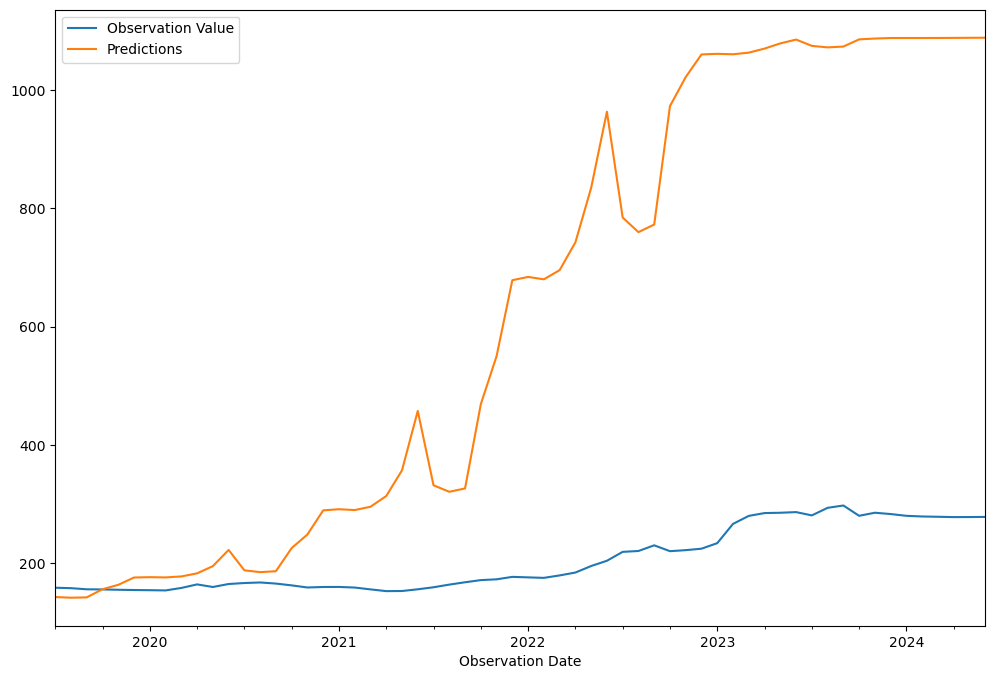

In [298]:
test.plot(figsize=(12,8))
plt.savefig('150_150_150.png')
plt.show()

## Prophet Library

In [299]:
from prophet import Prophet

In [300]:
df = pd.read_csv('data_series.csv')

In [301]:
df = df.drop(['Dataset', 'Series Key', 'Series','Unit','Observation Status','Observation Status Comment'], axis=1)

In [302]:
df.head()

Observation Date  Observation Value
0      30-Jun-2024         278.438722
1      31-May-2024         278.250082
2      30-Apr-2024         278.142450
3      31-Mar-2024         278.704966
4      29-Feb-2024         279.181670

In [303]:
df.tail()

Observation Date  Observation Value
918      31-Dec-1947            3.30852
919      30-Nov-1947            3.30852
920      31-Oct-1947            3.30852
921      30-Sep-1947            3.30852
922      31-Aug-1947            3.30852

In [304]:
df

Observation Date  Observation Value
0        30-Jun-2024         278.438722
1        31-May-2024         278.250082
2        30-Apr-2024         278.142450
3        31-Mar-2024         278.704966
4        29-Feb-2024         279.181670
..               ...                ...
918      31-Dec-1947           3.308520
919      30-Nov-1947           3.308520
920      31-Oct-1947           3.308520
921      30-Sep-1947           3.308520
922      31-Aug-1947           3.308520

[923 rows x 2 columns]

In [305]:
df.columns = ['ds','y']

In [306]:
df.head()

ds           y
0  30-Jun-2024  278.438722
1  31-May-2024  278.250082
2  30-Apr-2024  278.142450
3  31-Mar-2024  278.704966
4  29-Feb-2024  279.181670

In [307]:
df['ds'] = pd.to_datetime(df['ds'])

In [308]:
# Sort the DataFrame by the index (dates) in ascending order
df = df.sort_values(by='ds')

In [309]:
df.head()

ds        y
922 1947-08-31  3.30852
921 1947-09-30  3.30852
920 1947-10-31  3.30852
919 1947-11-30  3.30852
918 1947-12-31  3.30852

In [310]:
df.tail()

ds           y
4 2024-02-29  279.181670
3 2024-03-31  278.704966
2 2024-04-30  278.142450
1 2024-05-31  278.250082
0 2024-06-30  278.438722

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 922 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      923 non-null    datetime64[ns]
 1   y       923 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.6 KB


<Axes: xlabel='ds'>

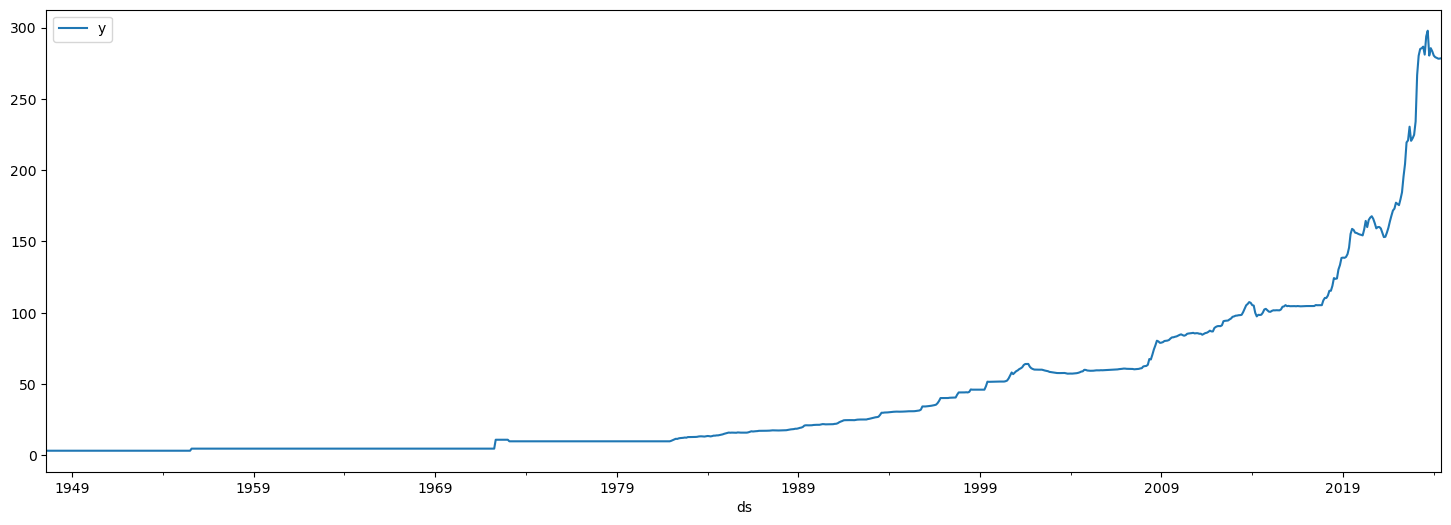

In [312]:
df.plot(x='ds',y='y',figsize=(18,6))

In [313]:
# Placeholder to hold our future predictions

In [314]:
c

11:05:59 - cmdstanpy - INFO - Chain [1] start processing
11:06:00 - cmdstanpy - INFO - Chain [1] done processing


In [315]:
future = m.make_future_dataframe(periods = 24,freq= 'M')

In [316]:
future.head()

ds
0 1947-08-31
1 1947-09-30
2 1947-10-31
3 1947-11-30
4 1947-12-31

In [317]:
future.tail()

ds
942 2026-02-28
943 2026-03-31
944 2026-04-30
945 2026-05-31
946 2026-06-30

In [318]:
len(df)

923

In [319]:
len(future)

947

In [320]:
forecast = m.predict(future)

In [321]:
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1947-08-31  2.539236  -15.627014   20.173151     2.539236     2.539236   
1 1947-09-30  2.553796  -16.507256   21.406371     2.553796     2.553796   
2 1947-10-31  2.568842  -15.681871   19.949738     2.568842     2.568842   
3 1947-11-30  2.583402  -15.948469   19.057776     2.583402     2.583402   
4 1947-12-31  2.598447  -15.524419   19.856871     2.598447     2.598447   

   additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0        0.008584              0.008584              0.008584  0.008584   
1       -0.072117             -0.072117             -0.072117 -0.072117   
2       -1.013950             -1.013950             -1.013950 -1.013950   
3       -0.593062             -0.593062             -0.593062 -0.593062   
4       -0.203338             -0.203338             -0.203338 -0.203338   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      0.008584      0.008584                   0.0   
1     -0.072117     -0.072117                   0.0   
2     -1.013950     -1.013950                   0.0   
3     -0.593062     -0.593062                   0.0   
4     -0.203338     -0.203338                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0  2.547820  
1                         0.0                         0.0  2.481679  
2                         0.0                         0.0  1.554892  
3                         0.0                         0.0  1.990340  
4                         0.0                         0.0  2.395109

In [322]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

ds        yhat  yhat_lower  yhat_upper
935 2025-07-31  223.521696  207.292938  242.534620
936 2025-08-31  224.718584  207.150940  243.348123
937 2025-09-30  225.759596  208.043472  243.398650
938 2025-10-31  226.458240  208.074827  243.415181
939 2025-11-30  227.039407  206.950130  243.912740
940 2025-12-31  227.711716  210.649108  245.356736
941 2026-01-31  228.337413  209.709925  245.664623
942 2026-02-28  229.308937  211.287598  247.342544
943 2026-03-31  230.364862  213.292520  248.323411
944 2026-04-30  231.200472  214.169564  249.156681
945 2026-05-31  232.145617  214.061113  249.807689
946 2026-06-30  233.208809  215.701851  250.577478

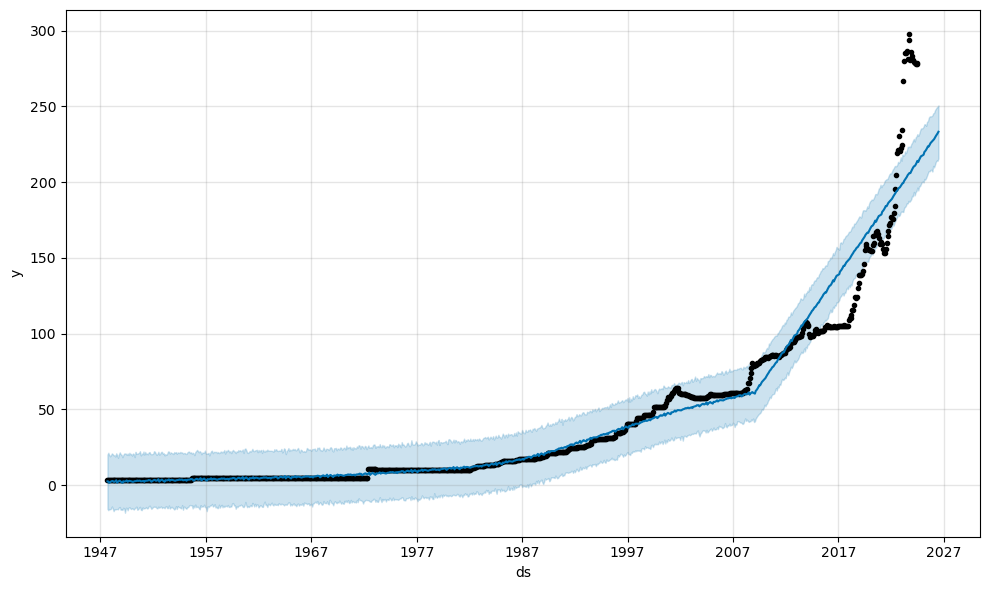

In [323]:
m.plot(forecast);

In [324]:
# import matplotlib.pyplot as plt
# m.plot(forecast)
# plt.xlim('2014-01-01','2022-01-01')

<Axes: xlabel='ds'>

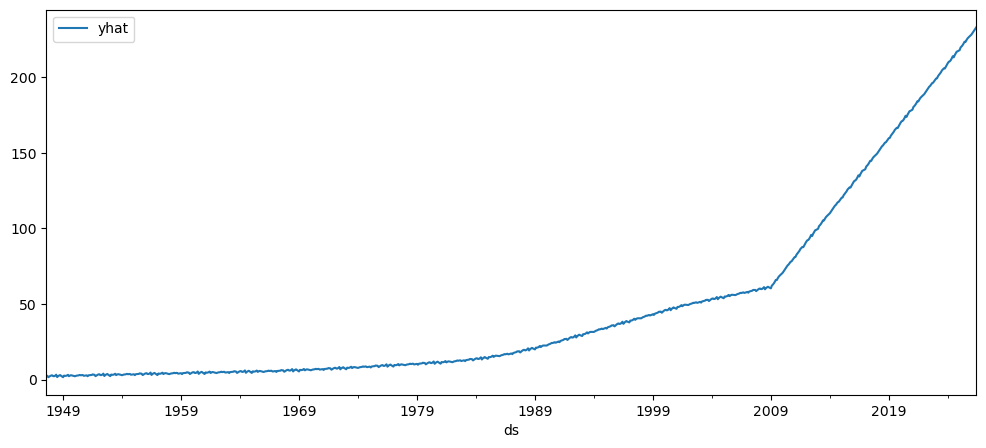

In [325]:
forecast.plot(x='ds',y='yhat')

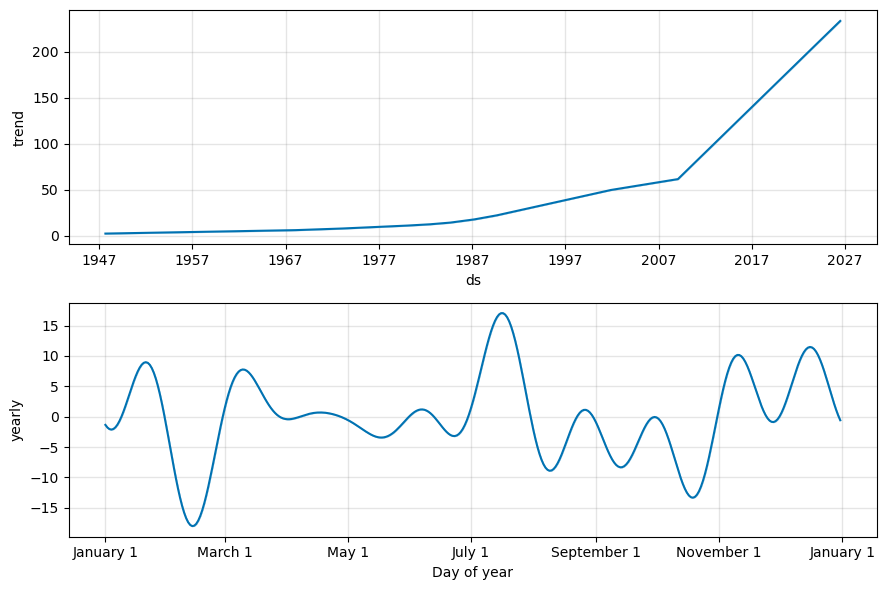

In [326]:
m.plot_components(forecast);


In [327]:
len(df)

923

In [328]:
len(df) - 120

803

In [329]:
train = df.iloc[:803]
test = df.iloc[803:]

In [330]:
test

ds           y
119 2014-07-31   98.654342
118 2014-08-31  100.089726
117 2014-09-30  102.342495
116 2014-10-31  102.753697
115 2014-11-30  101.787426
..         ...         ...
4   2024-02-29  279.181670
3   2024-03-31  278.704966
2   2024-04-30  278.142450
1   2024-05-31  278.250082
0   2024-06-30  278.438722

[120 rows x 2 columns]

<Axes: >

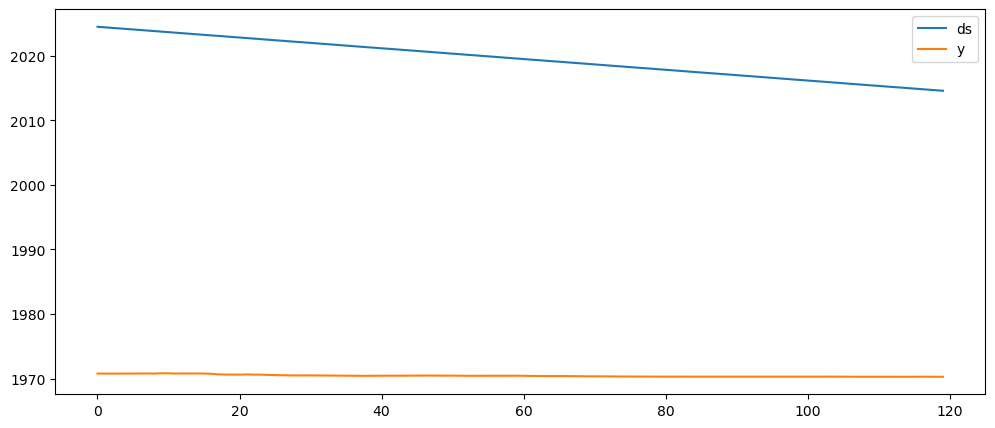

In [331]:
test.plot()

In [332]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=120,freq='M')
forecast = m.predict(future)

11:06:02 - cmdstanpy - INFO - Chain [1] start processing
11:06:02 - cmdstanpy - INFO - Chain [1] done processing


In [333]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
918 2024-02-29  128.535226  123.589319  133.199079   126.451182   130.701597   
919 2024-03-31  128.820286  124.240440  133.167655   126.709716   131.008237   
920 2024-04-30  129.096150  124.037239  134.053312   126.959490   131.308041   
921 2024-05-31  129.381210  125.032957  134.514340   127.217785   131.617742   
922 2024-06-30  129.657075  125.289871  134.805507   127.469328   131.909183   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
918       -0.314666             -0.314666             -0.314666 -0.314666   
919       -0.132674             -0.132674             -0.132674 -0.132674   
920       -0.079323             -0.079323             -0.079323 -0.079323   
921        0.264869              0.264869              0.264869  0.264869   
922        0.168943              0.168943              0.168943  0.168943   

     yearly_lower  yearly_upper  multiplicative_terms  \
918     -0.314666     -0.314666                   0.0   
919     -0.132674     -0.132674                   0.0   
920     -0.079323     -0.079323                   0.0   
921      0.264869      0.264869                   0.0   
922      0.168943      0.168943                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
918                         0.0                         0.0  128.220560  
919                         0.0                         0.0  128.687612  
920                         0.0                         0.0  129.016827  
921                         0.0                         0.0  129.646080  
922                         0.0                         0.0  129.826018

In [334]:
test.tail()

ds           y
4 2024-02-29  279.181670
3 2024-03-31  278.704966
2 2024-04-30  278.142450
1 2024-05-31  278.250082
0 2024-06-30  278.438722

<Axes: xlabel='ds'>

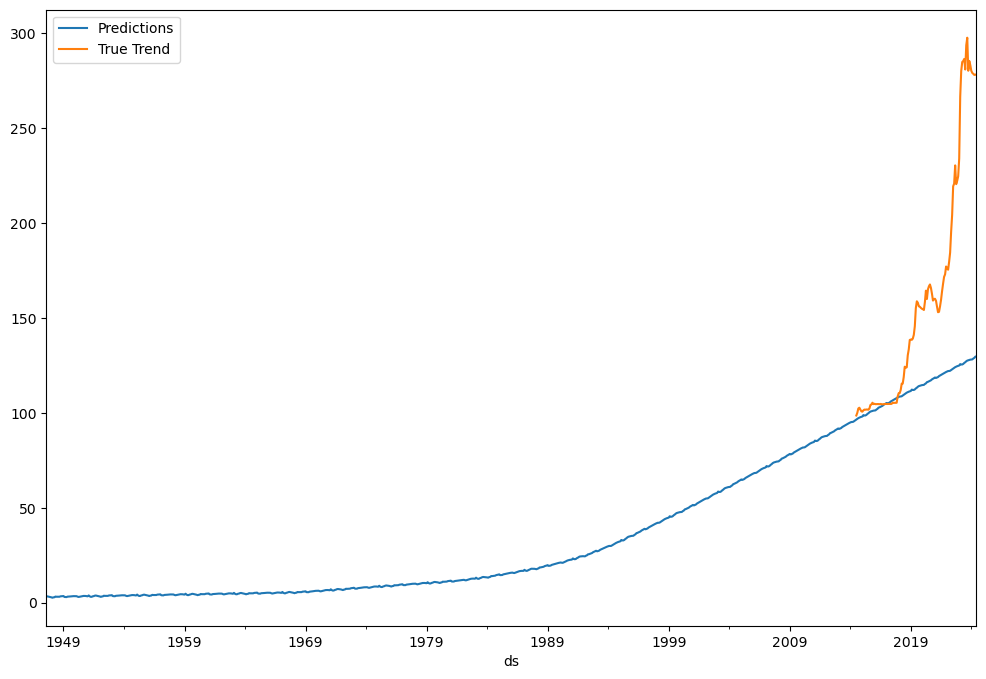

In [335]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Trend',legend=True,ax=ax)

In [336]:
from statsmodels.tools.eval_measures import rmse

In [337]:
predictions = forecast.iloc[-120:]['yhat']

In [338]:
predictions

803     96.494426
804     96.915772
805     97.253685
806     97.528441
807     97.762834
          ...    
918    128.220560
919    128.687612
920    129.016827
921    129.646080
922    129.826018
Name: yhat, Length: 120, dtype: float64

In [339]:
test['y']

119     98.654342
118    100.089726
117    102.342495
116    102.753697
115    101.787426
          ...    
4      279.181670
3      278.704966
2      278.142450
1      278.250082
0      278.438722
Name: y, Length: 120, dtype: float64

In [340]:
rmse(predictions,test['y'])

68.9210899995394

In [341]:
test.mean()

ds    2019-07-16 05:48:00
y              158.259708
dtype: object

### Diagnostics

In [342]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [343]:
len(df)

923

In [344]:
len(df)/120

7.691666666666666

In [345]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [346]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

  0%|          | 0/13 [00:00<?, ?it/s]

11:06:09 - cmdstanpy - INFO - Chain [1] start processing
11:06:09 - cmdstanpy - INFO - Chain [1] done processing
11:06:09 - cmdstanpy - INFO - Chain [1] start processing
11:06:09 - cmdstanpy - INFO - Chain [1] done processing
11:06:10 - cmdstanpy - INFO - Chain [1] start processing
11:06:10 - cmdstanpy - INFO - Chain [1] done processing
11:06:10 - cmdstanpy - INFO - Chain [1] start processing
11:06:10 - cmdstanpy - INFO - Chain [1] done processing
11:06:11 - cmdstanpy - INFO - Chain [1] start processing
11:06:11 - cmdstanpy - INFO - Chain [1] done processing
11:06:11 - cmdstanpy - INFO - Chain [1] start processing
11:06:12 - cmdstanpy - INFO - Chain [1] done processing
11:06:12 - cmdstanpy - INFO - Chain [1] start processing
11:06:12 - cmdstanpy - INFO - Chain [1] done processing
11:06:12 - cmdstanpy - INFO - Chain [1] start processing
11:06:13 - cmdstanpy - INFO - Chain [1] done processing
11:06:13 - cmdstanpy - INFO - Chain [1] start processing
11:06:13 - cmdstanpy - INFO - Chain [1]

In [347]:
df_cv.head()

ds     yhat  yhat_lower  yhat_upper        y     cutoff
0 1953-07-31  3.30852     3.30852     3.30852  3.30852 1953-07-15
1 1953-08-31  3.30852     3.30852     3.30852  3.30852 1953-07-15
2 1953-09-30  3.30852     3.30852     3.30852  3.30852 1953-07-15
3 1953-10-31  3.30852     3.30852     3.30852  3.30852 1953-07-15
4 1953-11-30  3.30852     3.30852     3.30852  3.30852 1953-07-15

In [348]:
df_cv.tail()

ds       yhat  yhat_lower  yhat_upper           y     cutoff
151 2014-02-28  93.022351   89.071138   96.940995  105.060519 2013-06-30
152 2014-03-31  93.140498   89.612842   97.125494   99.977739 2013-06-30
153 2014-04-30  93.299103   89.530917   96.902514   97.492761 2013-06-30
154 2014-05-31  93.659502   89.785251   97.361877   98.594713 2013-06-30
155 2014-06-30  94.053420   90.181826   97.835816   98.467899 2013-06-30

In [349]:
performance_metrics(df_cv)

horizon        mse      rmse       mae      mape     mdape     smape  \
0    48 days  11.472244  3.387070  2.098589  0.077518  0.075502  0.079234   
1    49 days  11.472939  3.387173  2.105398  0.078945  0.075502  0.080646   
2    51 days  11.464299  3.385897  2.082013  0.074042  0.075489  0.075926   
3    52 days  11.750947  3.427965  2.212862  0.086423  0.093223  0.089924   
4    53 days  11.928377  3.453748  2.320804  0.097228  0.107593  0.099894   
..       ...        ...       ...       ...       ...       ...       ...   
137 360 days  17.652232  4.201456  3.010783  0.098380  0.108274  0.099587   
138 361 days  22.417364  4.734698  3.483744  0.104706  0.115748  0.106739   
139 363 days  27.336159  5.228399  3.876243  0.108088  0.115839  0.108928   
140 364 days  31.326935  5.597047  4.139191  0.108239  0.118095  0.109097   
141 365 days  27.006230  5.196752  3.821396  0.100615  0.115748  0.102324   

     coverage  
0    0.400000  
1    0.400000  
2    0.466667  
3    0.400000  
4    0.333333  
..        ...  
137  0.200000  
138  0.200000  
139  0.200000  
140  0.200000  
141  0.200000  

[142 rows x 8 columns]

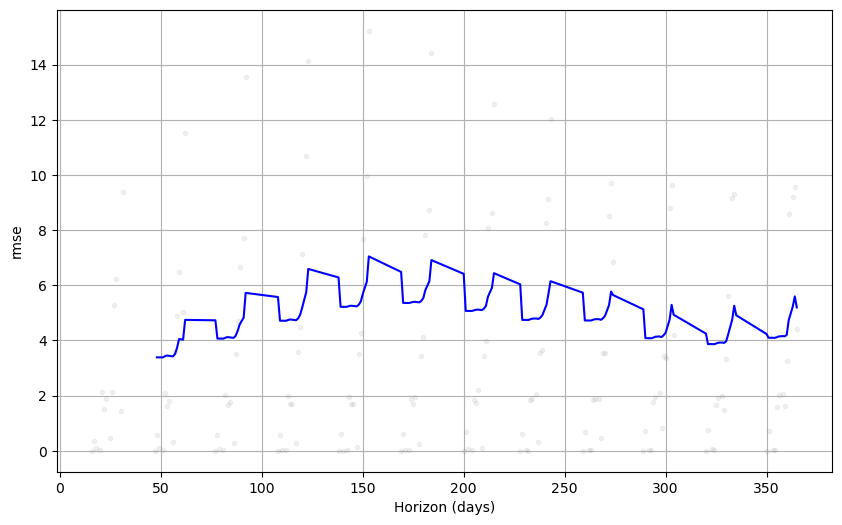

In [350]:
plot_cross_validation_metric(df_cv, metric='rmse');

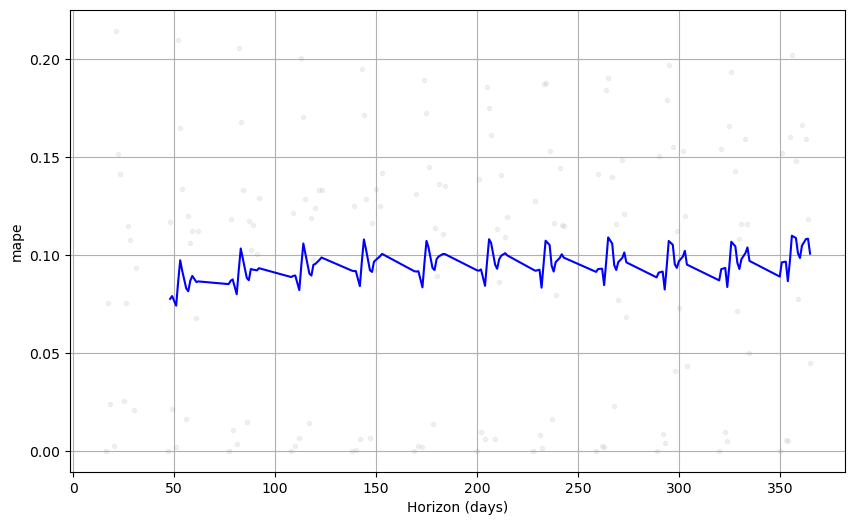

In [351]:
plot_cross_validation_metric(df_cv, metric='mape');

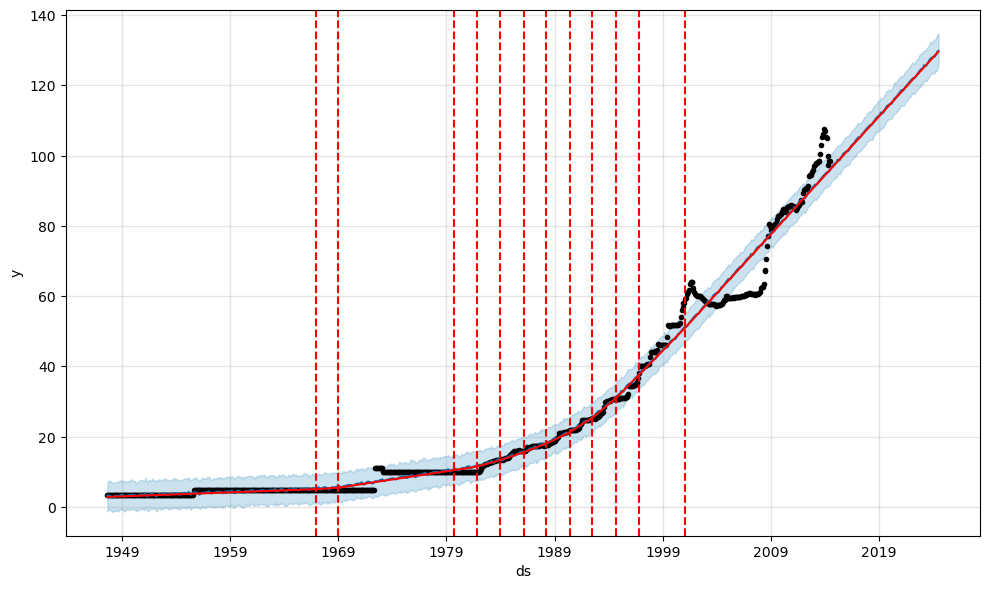

In [352]:

from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

11:06:17 - cmdstanpy - INFO - Chain [1] start processing
11:06:17 - cmdstanpy - INFO - Chain [1] done processing


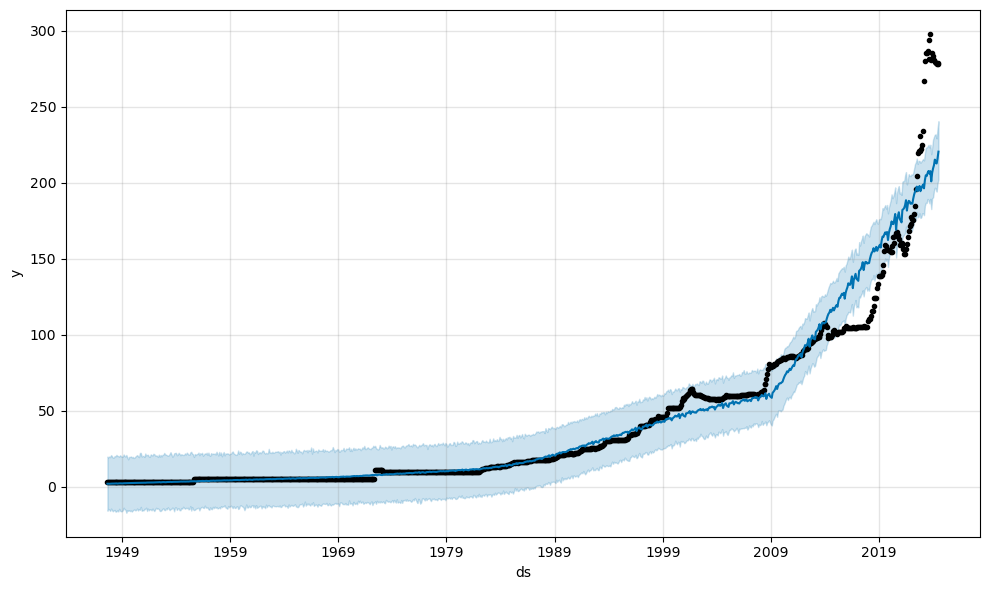

In [353]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

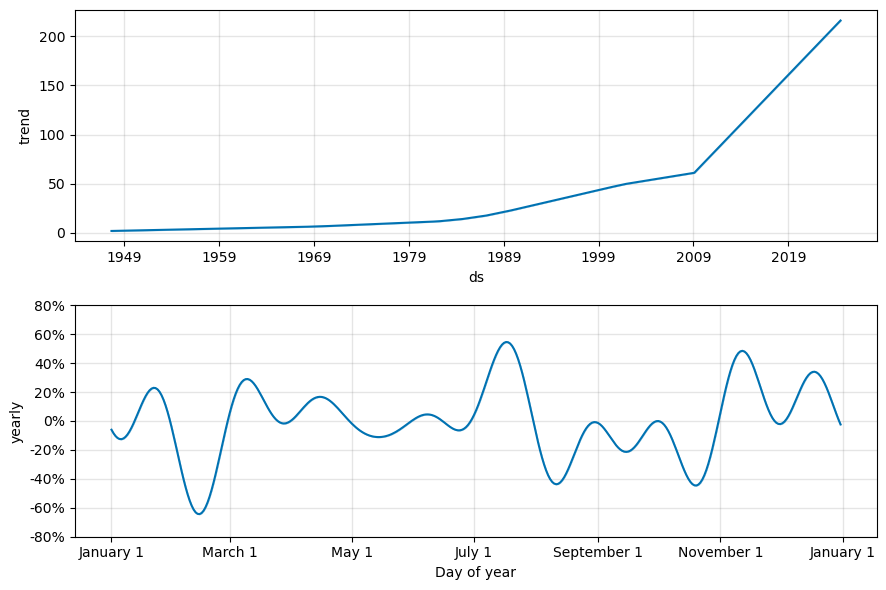

In [354]:
fig = m.plot_components(forecast)

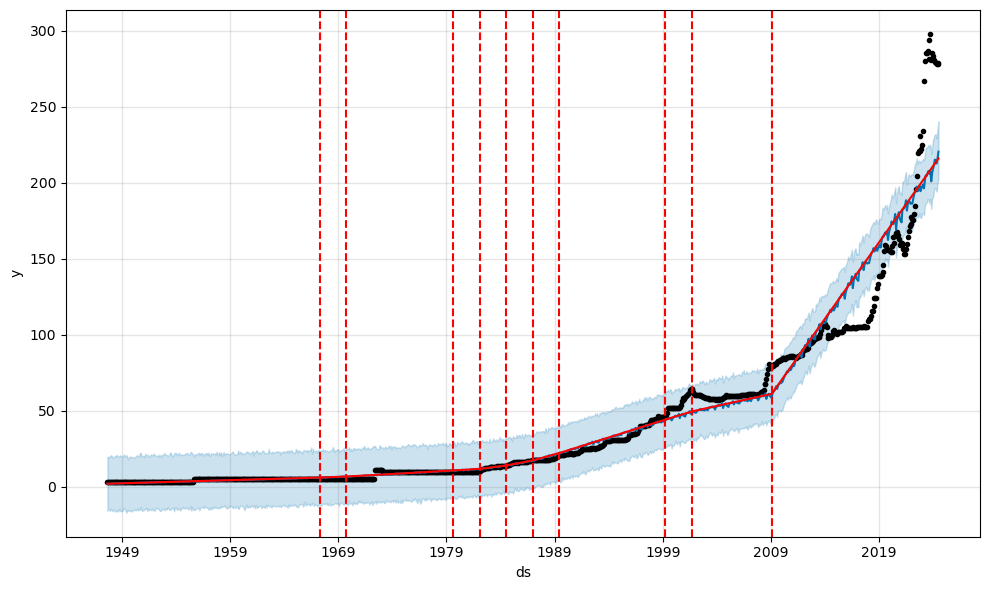

In [355]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)